## 1. Perkenalan
Nama : Evan Aprillio B  
Batch : RMT-019  
Objective : Kamu adalah seorang data scientist dari sebuah perusahaan credit-card, pada tahun kemarin perusahaan rugi besar karena adanya pengguna yang gagal membayar. atasan kamu menyuruh kamu untuk membuat sebuah model machine learning untuk mendeteksi customer mana yang akan gagal bayar menggunakan data dari kebiasaan mereka membayar di data-data sebelumnya. fokus dari model ini adalah memprediksikan customer mana yang mempunyai kemungkinan besar untuk default payment sehingga dapat menolak credit untuk nasabah yang memiliki kemungkinan besar untuk defaulting payment  
Problem Statement :
1. Perusahaan mengalami kerugian karena banyak nasabah yang default
2. Menemukan ciri-ciri nasabah yang default 

## 2. Import Library

In [1]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
import scipy
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

## 3. Data Loading

### Query SQL : 

select limit_balance, cast(sex as int64)as sex ,cast(education_level as int64)as education_level, cast(marital_status as int64)as marital_status, age, pay_0, pay_2, pay_3, pay_4, cast(pay_5 as float64)as pay_5, cast(pay_6 as float64)as pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, cast(default_payment_next_month as int64)as default_payment_next_month

from bigquery-public-data.ml_datasets.credit_card_default  
limit 37943

### Data Import

In [2]:
# memanggil data
df=pd.read_csv("h8dsft_P1M1_EvanAprillioB.csv")
# memanggil 10 data pertama
df.head(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   
5       300000.0    2                4               2  32.0    0.0    0.0   
6       130000.0    1                1               1  45.0    0.0    0.0   
7       200000.0    1                1               1  58.0    0.0    0.0   
8       500000.0    1                1               1  39.0    0.0    0.0   
9       230000.0    1                1               1  48.0    0.0    0.0   

   pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0    0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1    0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2    0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3    0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4    0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
5    0.0    0.0    0.0  ...     65150.0      -450.0       700.0    15235.0   
6    0.0    0.0    0.0  ...     62377.0     63832.0     65099.0     2886.0   
7    0.0    0.0    0.0  ...    124647.0    126921.0    129167.0     7822.0   
8    0.0    0.0    0.0  ...    174500.0    137406.0    204975.0    54209.0   
9    0.0    0.0    0.0  ...    105508.0    108101.0    110094.0     7000.0   

   pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0     2208.0     1336.0     2232.0      542.0      348.0   
1     2164.0     2500.0     3480.0     2500.0     3000.0   
2     1019.0      900.0        0.0     1500.0        0.0   
3     5000.0     1137.0     5000.0     1085.0     5000.0   
4   146896.0   157436.0     4600.0     4709.0     5600.0   
5     1491.0     1303.0        0.0     2000.0     1400.0   
6     2908.0     2129.0     2354.0     2366.0     2291.0   
7     4417.0     4446.0     4597.0     4677.0     4698.0   
8     4607.0     4603.0     5224.0   207440.0     7509.0   
9     6607.0     3773.0     4290.0     4164.0     2000.0   

   default_payment_next_month  
0                           1  
1                           0  
2                           1  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  

[10 rows x 24 columns]

In [3]:
# memanggil 10 data terakhir
df.tail(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2955       360000.0    2                2               2  26.0   -1.0   -1.0   
2956       100000.0    1                3               1  40.0    0.0    0.0   
2957        30000.0    2                3               1  48.0    1.0   -1.0   
2958        80000.0    2                3               1  39.0   -1.0   -1.0   
2959        20000.0    1                3               2  26.0   -1.0   -1.0   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2955   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      463.0   
2956   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0     2000.0   
2957   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0      200.0   
2958   -1.0   -1.0   -2.0  ...         0.0         0.0      5000.0     5000.0   
2959   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     1560.0   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2955     2500.0        0.0        0.0        0.0        0.0   
2956     2377.0    40000.0        0.0        0.0        0.0   
2957        0.0        0.0        0.0        0.0        0.0   
2958     5000.0        0.0     5000.0     5000.0      470.0   
2959        0.0        0.0        0.0        0.0        0.0   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
2955                           0  
2956                           0  
2957                           0  
2958                           0  
2959                           0  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[10 rows x 24 columns]

In [4]:
# melihat info dari df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

### Deskripsi Data


| Column | Description|
|-----------------------|------------------------|
| limit balance|Amount of given credit in NT dollars (includes individual and family/supplementary credit)  |
| sex | Gender (1=male, 2=female) |
| education_level|Education Level (1=graduate school, 2=university, 3=highschool,4=others, 5=unknown, 6=unknown)  |
| marital_status| Marital status (1=married, 2=single, 3=others) | 
| age | age | 
| pay | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)|
| bill_amt | Amount of bill statement in September, 2005 until April 2005 (step backward in month) (NT dollar)| 
| pay_amt | Amount of previous payment in September, 2005 (step backward in month) (NT dollar)|

## 4. EDA

In [5]:
df

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0       0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1       0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2       0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3       0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4       0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0        2208.0     1336.0     2232.0      542.0      348.0   
1        2164.0     2500.0     3480.0     2500.0     3000.0   
2        1019.0      900.0        0.0     1500.0        0.0   
3        5000.0     1137.0     5000.0     1085.0     5000.0   
4      146896.0   157436.0     4600.0     4709.0     5600.0   
...         ...        ...        ...        ...        ...   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
0                              1  
1                              0  
2                              1  
3                              0  
4                              0  
...                          ...  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[2965 rows x 24 columns]

In [6]:
df.describe()

limit_balance          sex  education_level  marital_status  \
count    2965.000000  2965.000000      2965.000000     2965.000000   
mean   163369.308600     1.607757         1.849578        1.559865   
std    125030.415472     0.488333         0.778184        0.522317   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2965.000000  2965.000000  2965.000000  2965.000000  2965.000000   
mean     35.193255     0.005059    -0.122428    -0.141653    -0.185160   
std       9.109439     1.114395     1.180784     1.183630     1.178322   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      69.000000     8.000000     7.000000     7.000000     8.000000   

             pay_5  ...     bill_amt_4     bill_amt_5     bill_amt_6  \
count  2965.000000  ...    2965.000000    2965.000000    2965.000000   
mean     -0.225295  ...   44089.683305   40956.080607   39773.072513   
std       1.159003  ...   61907.454056   58271.904751   57303.488981   
min      -2.000000  ...  -46627.000000  -46627.000000  -73895.000000   
25%      -1.000000  ...    2582.000000    1958.000000    1430.000000   
50%       0.000000  ...   19894.000000   18814.000000   18508.000000   
75%       0.000000  ...   58622.000000   53373.000000   52287.000000   
max       7.000000  ...  488808.000000  441981.000000  436172.000000   

           pay_amt_1     pay_amt_2      pay_amt_3      pay_amt_4  \
count    2965.000000  2.965000e+03    2965.000000    2965.000000   
mean     6348.902867  6.272494e+03    5150.497133    4561.376054   
std     20885.735336  2.887967e+04   14287.079982   13281.499599   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1013.000000  9.900000e+02     477.000000     313.000000   
50%      2234.000000  2.175000e+03    1994.000000    1600.000000   
75%      5087.000000  5.000000e+03    4500.000000    4000.000000   
max    493358.000000  1.227082e+06  199209.000000  202076.000000   

           pay_amt_5      pay_amt_6  default_payment_next_month  
count    2965.000000    2965.000000                 2965.000000  
mean     4913.286678    5382.701518                    0.214165  
std     16734.340778   17275.953029                    0.410311  
min         0.000000       0.000000                    0.000000  
25%       323.000000     173.000000                    0.000000  
50%      1646.000000    1615.000000                    0.000000  
75%      4021.000000    4081.000000                    0.000000  
max    388071.000000  403500.000000                    1.000000  

[8 rows x 24 columns]

- Umur min age=21 dan max =69 

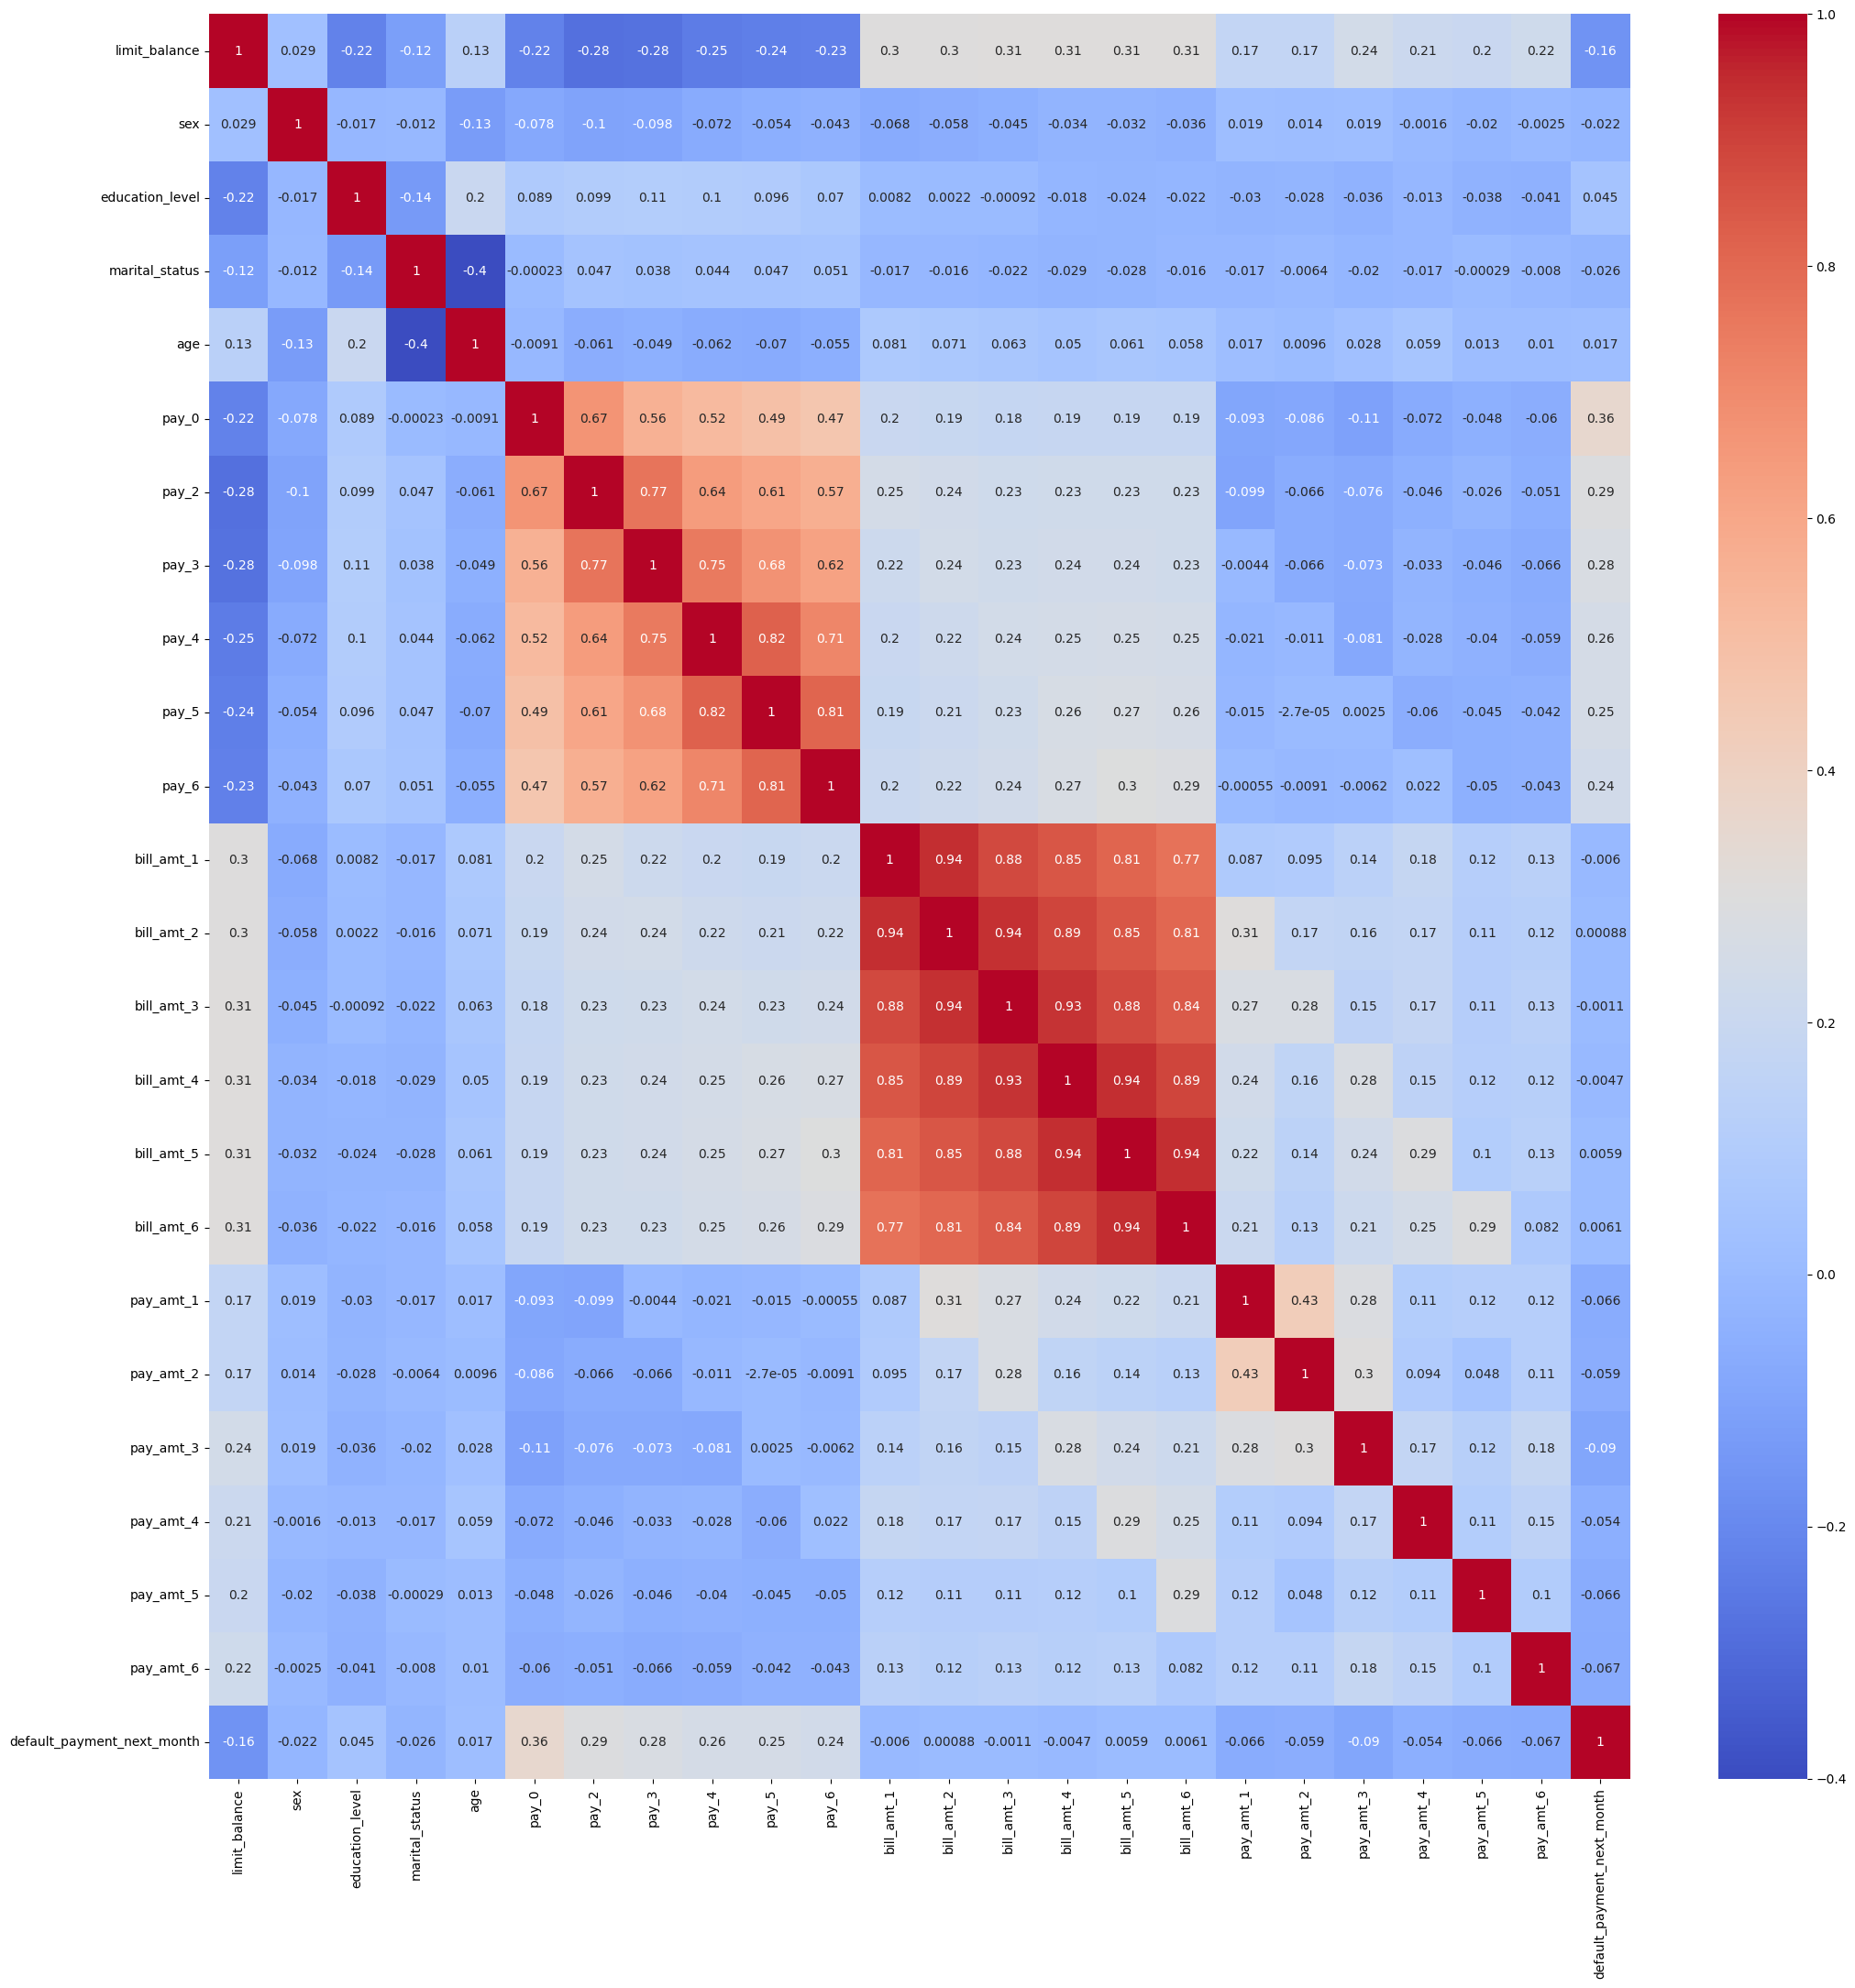

In [7]:
#melihat Korelasi antar kolom
heatmapDf=df.corr()
fig, ax=plt.subplots(figsize=(25,25))
sns.heatmap(heatmapDf, annot=True, cmap="coolwarm",ax=ax)
plt.show()

- Dari setiap jenis kolom, jenis kolom pay adalah kolom yang paling banyak memiliki korelasi dengan target(default_payment_next_month) jika dilihat dengan metode pearson.  

In [8]:
df["sex"].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

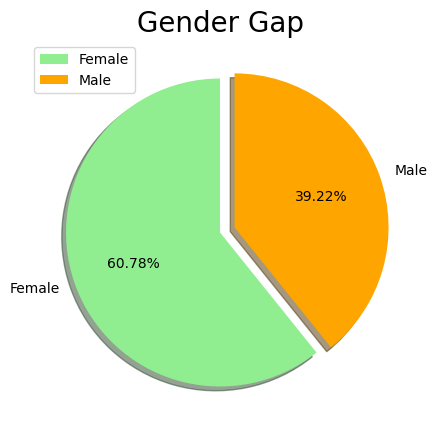

In [9]:
labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.legend()
plt.show()

- cukup jauh perbedaan antara nasabah male dan female. 60.78% nasabah adalah female dan 39.22% adalah male
- apakah ada perbedaan persenan nasabah default menurut jenis kelamin? saya akan melihat lebih lanjut


In [10]:
#membuat variabel jenis kelamin
male= df[(df["sex"] == 1)]
female = df[(df["sex"] == 2)]
counts_male = male["default_payment_next_month"].value_counts()
counts_female = female["default_payment_next_month"].value_counts()
counts_df= df["default_payment_next_month"].value_counts()
counts_female

0    1429
1     373
Name: default_payment_next_month, dtype: int64

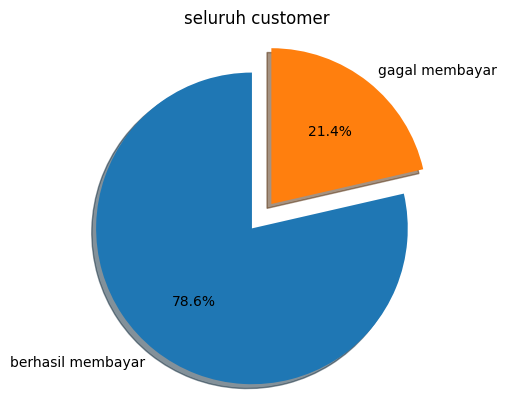

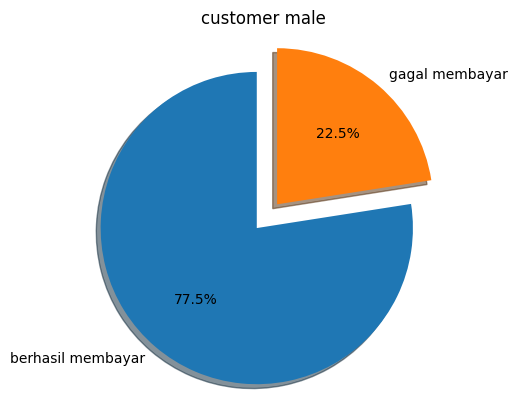

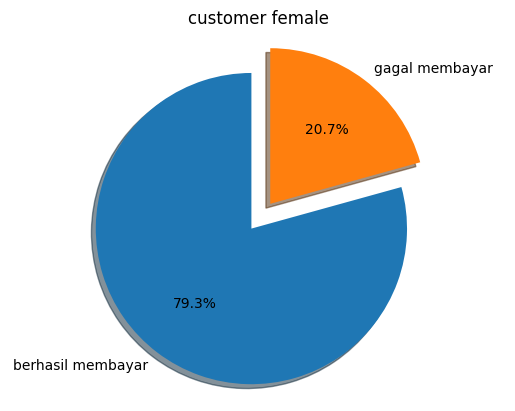

In [11]:
#membuat piechart yang berisi kematian pada setiap jenis kelamin dan keseluruhan data
labels = ["berhasil membayar", "gagal membayar"]
explode = (0.2, 0)

fig1, ax1 = plt.subplots()
ax1.pie(counts_df, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('seluruh customer ')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(counts_male, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('customer male ')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(counts_female, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("customer female")
plt.show()


1. terlihat dari plot bahwa persenan nasabah male lebih banyak yang gagal membayar dibandingkan dengan nasabah female. nasabah male memiliki persenan gagal sebesar 22.5% sedangkan female sebesar 20.7%

In [12]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak ada nilai null di dataframe ini

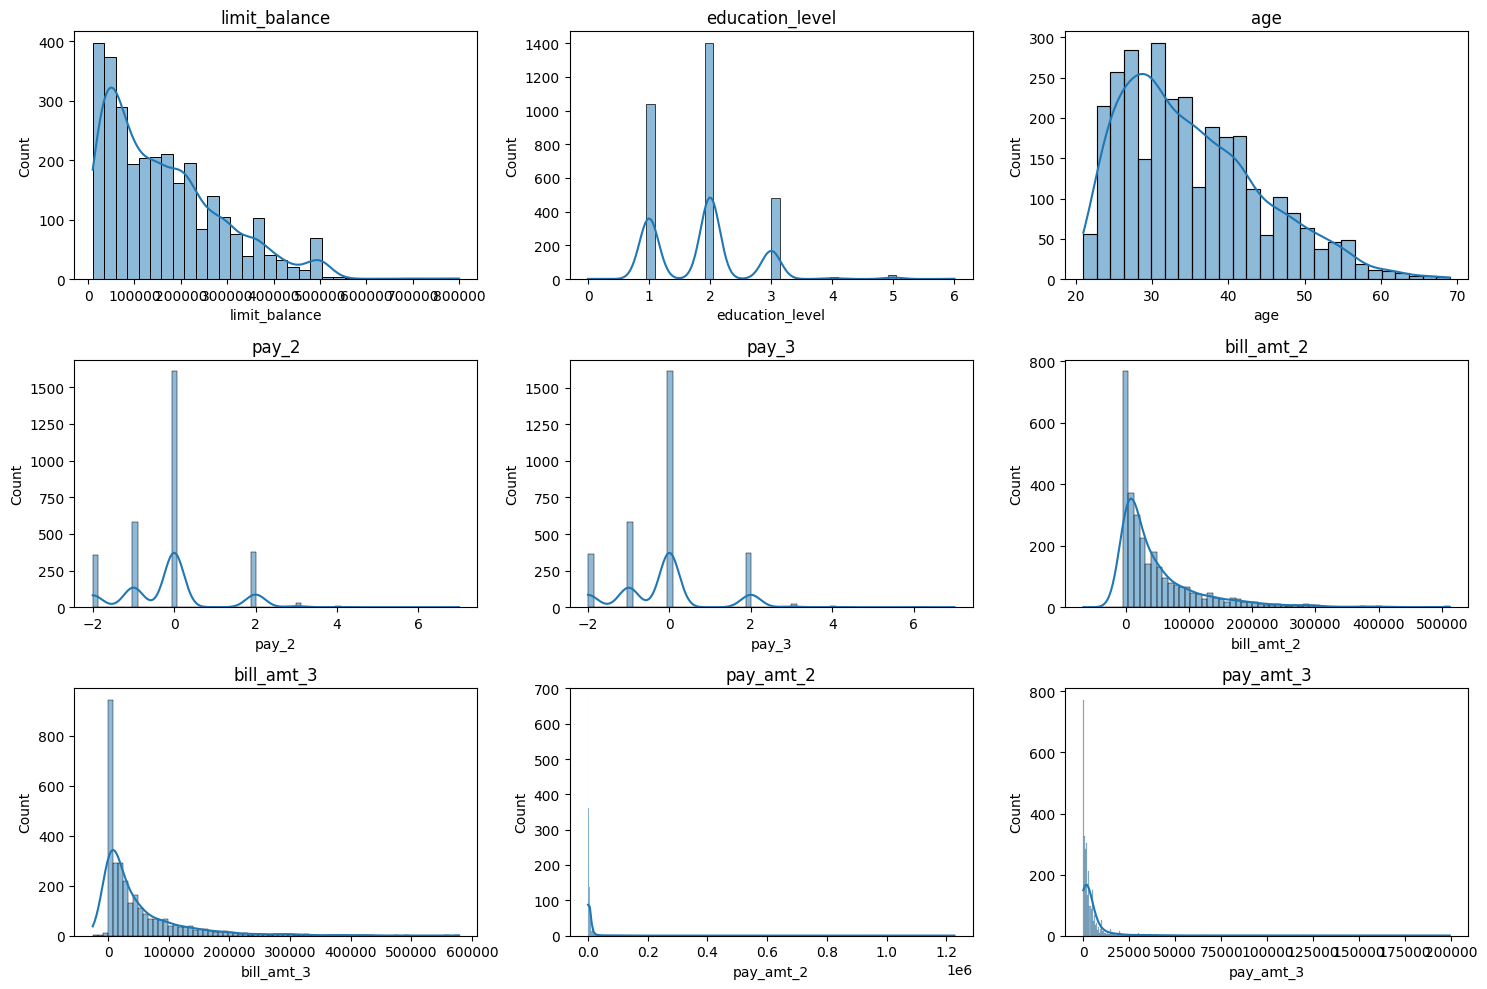

In [13]:
# List of columns for histogram
columns = ["limit_balance", "education_level", "age", "pay_2", "pay_3", "bill_amt_2", "bill_amt_3", "pay_amt_2", "pay_amt_3"]

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Plot histograms with KDE
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(column)

# Display the plot
plt.tight_layout()
plt.show()


1. Sebagian besar nasabah memiliki education level 1,2,3 yaitu 1= graduate school, 2=university, dan 3=Highschool

2. Sebaran data numerik asli( bukan berasal dari kategorik yang di encoding) kebanyakan tidak normal miring ke kanan  

3. Sebagian besar nasabah memiliki limit balance di kisaran 10.000 New Dollar Taiwan - 100.000 New Dollar Taiwan 



In [14]:
#melihat value counts dari setiap data education_level
df["education_level"].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [15]:
#melihat berapa berapa banyak yang default menurut tingkat pendidikan
default_by_education = df[df["default_payment_next_month"] == 1].groupby("education_level").size()
default_by_education

education_level
1    177
2    342
3    113
5      1
6      2
dtype: int64

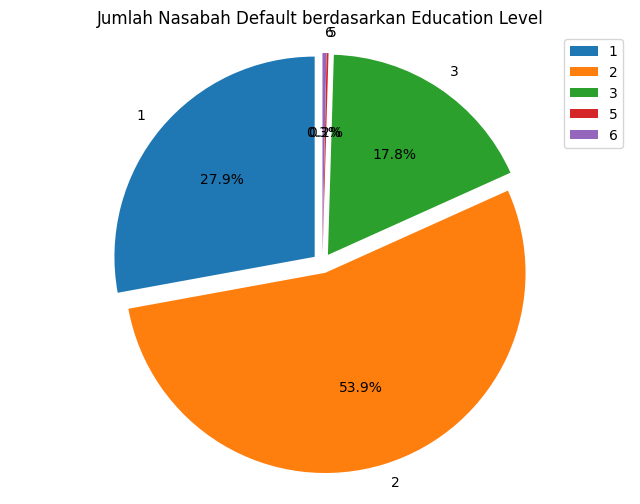

In [16]:
# buat visualisasinya
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(8, 6))
plt.pie(default_by_education,explode=explode, labels=default_by_education.index, autopct='%1.1f%%', startangle=90)
plt.title("Jumlah Nasabah Default berdasarkan Education Level")
plt.axis('equal') 
plt.legend() 
plt.show()

- Sebesar 53.9 persen nasabah yang default berasal dari tingkat pendidikan 2 yaitu university tapi mungkin itu disebabkan karena kebanyakan data mempunyai tingkat pendidikan 2 yaitu university
- meskipun hanya memiliki 483 data, education_level 3 yaitu highschool memiliki tingkatan default yang besar yaitu 17.8% dari seluruh data yang default atau sebesar 113 jumlah data 

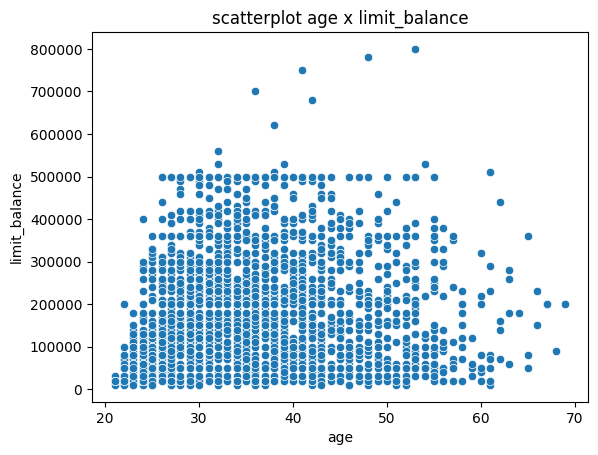

In [17]:
sns.scatterplot(data=df,x='age', y='limit_balance')
plt.title('scatterplot age x limit_balance');

In [18]:
#cek data duplikat
duplicateCount=df.duplicated().sum()
print("jumlah data duplicate=",duplicateCount)

jumlah data duplicate= 1


In [19]:
#lihat ukuran df
df.shape

(2965, 24)

In [20]:
# Menghapus data duplikat dan cek ukuranya
dc = df.drop_duplicates()
dc.shape

(2964, 24)

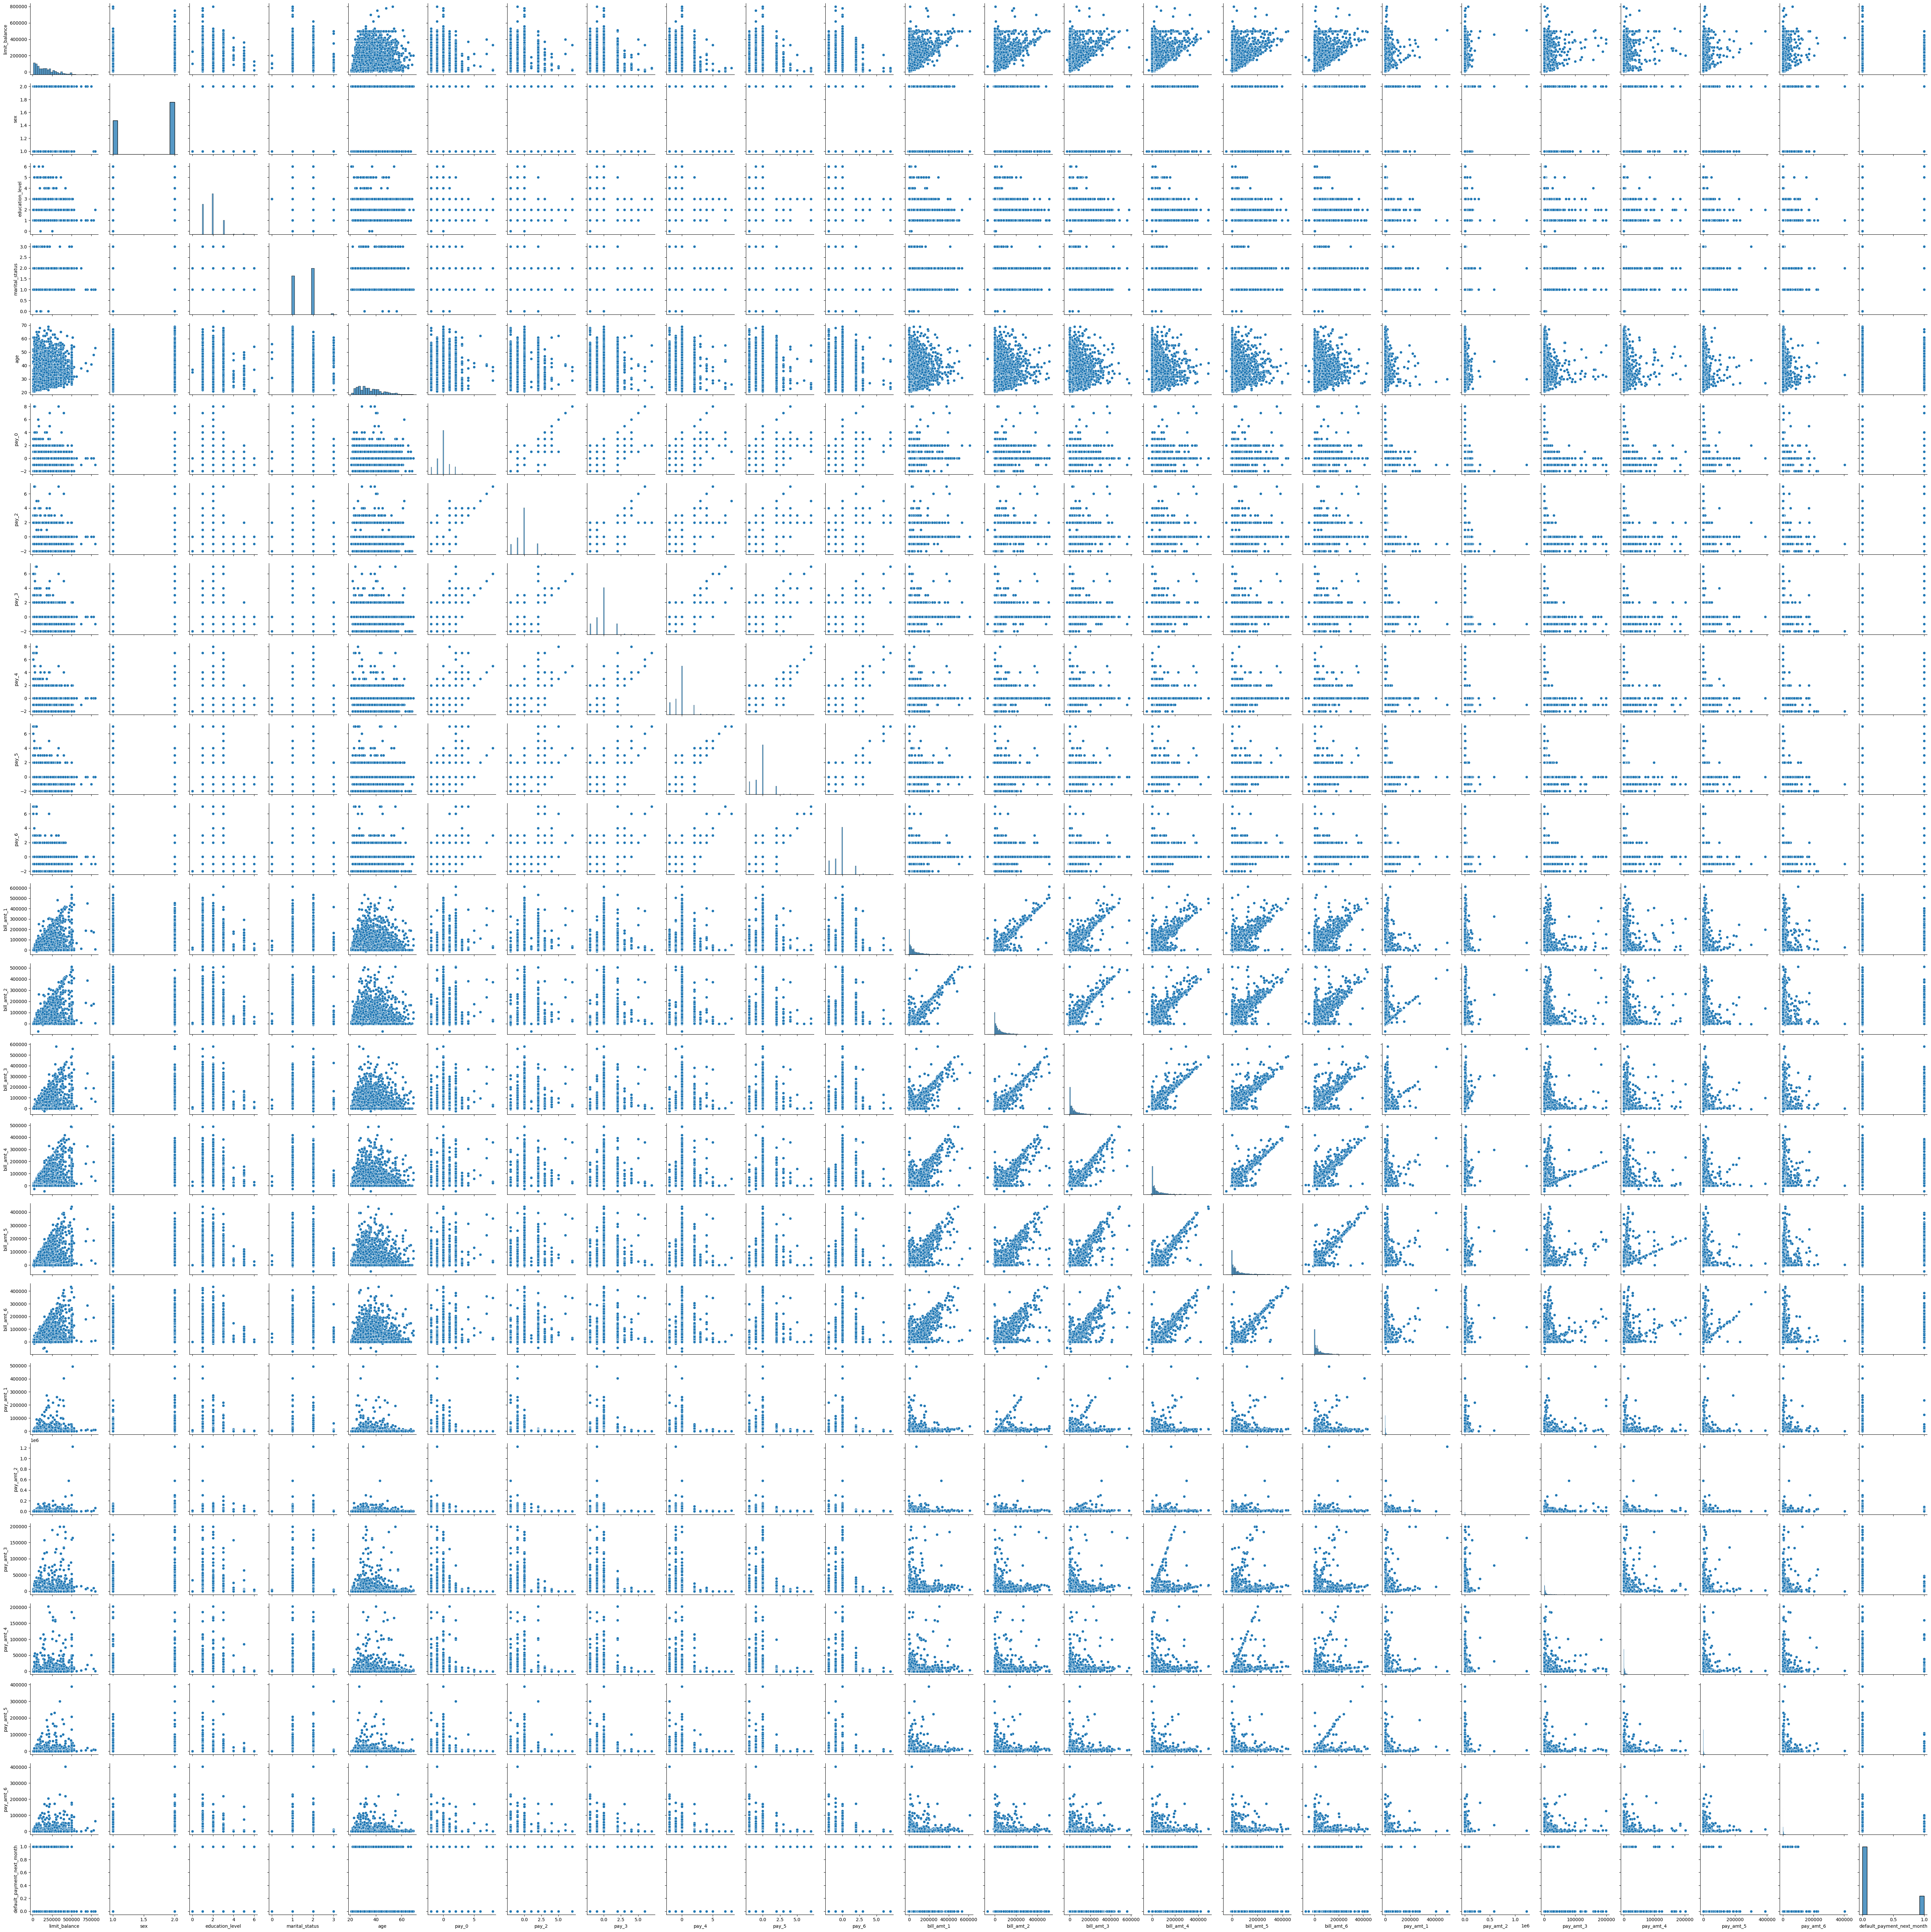

In [21]:
sns.pairplot(df)

## 5. Feature Enggineering

## 6. Splitting Data

In [22]:
#mengsplit x dan y dan melihat sebaran data y
X = dc.drop(["default_payment_next_month"], axis=1)
y = dc["default_payment_next_month"]
y.value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

In [23]:
# split train dengan test
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=69,stratify=y)
print("train size :" ,X_train.shape)
print("test size :" ,X_test.shape)
X_train.head(1)

train size : (2371, 23)
test size : (593, 23)


limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
1045        50000.0    1                2               1  53.0    2.0    0.0   

      pay_3  pay_4  pay_5  ...  bill_amt_3  bill_amt_4  bill_amt_5  \
1045    0.0    2.0    0.0  ...     21904.0     21243.0     20225.0   

      bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
1045     19850.0     1306.0     3264.0        0.0      846.0      856.0   

      pay_amt_6  
1045      804.0  

[1 rows x 23 columns]

In [24]:
#melihat perbandingan nilai y antara test dengan train
print("train :\n", y_train.value_counts())
print("test :\n", y_test.value_counts())

train :
 0    1863
1     508
Name: default_payment_next_month, dtype: int64
test :
 0    466
1    127
Name: default_payment_next_month, dtype: int64


>Karena kolom semua beritipe numerik maka tidak perlu di split menurut datatype 

### Handling Missing Values
 > missing values tidak ada

### Handling Outlier

In [25]:
X_train.skew()

limit_balance       0.900491
sex                -0.458054
education_level     0.860670
marital_status     -0.018505
age                 0.755947
pay_0               0.982719
pay_2               0.875702
pay_3               0.906923
pay_4               0.979425
pay_5               0.942863
pay_6               0.859795
bill_amt_1          2.482511
bill_amt_2          2.463661
bill_amt_3          2.585707
bill_amt_4          2.431084
bill_amt_5          2.399026
bill_amt_6          2.438593
pay_amt_1          11.834142
pay_amt_2          29.127337
pay_amt_3           7.941230
pay_amt_4           8.339395
pay_amt_5          11.849489
pay_amt_6           9.693121
dtype: float64

> Analisis Sebelum Handling Outlier
- Kolom-Kolom memiliki skewness yang besar yang membuat distribusi tidak normal yang membuat saya berasumsi bahwa banyak kolom yang memiliki outlier, akan tetapi kolom pay,bill_amt, dan pay_amt berisi hal yang sebenarnya sama hanya berbeda bulan. oleh karena itu normal adanya banyak outlier dalam kolom tersebut, karena kebanyakan data akan memiliki nilai 0 seperti di nilai kolom bill_amt, dan pay_amt. oleh karena itu saya akan melakukan handling melakukan winsorized saja karena jika di drop maka akan sangat banyak sekali data yang akan terbuang

- Kolom sex, education_level, marital_status, dan pay merupakan kolom kategorik yang sudah di encode karena itu tidak perlu di scaling atau dihandling outliernya

- Kolom yang saya handling dengan drop hanya di age saja

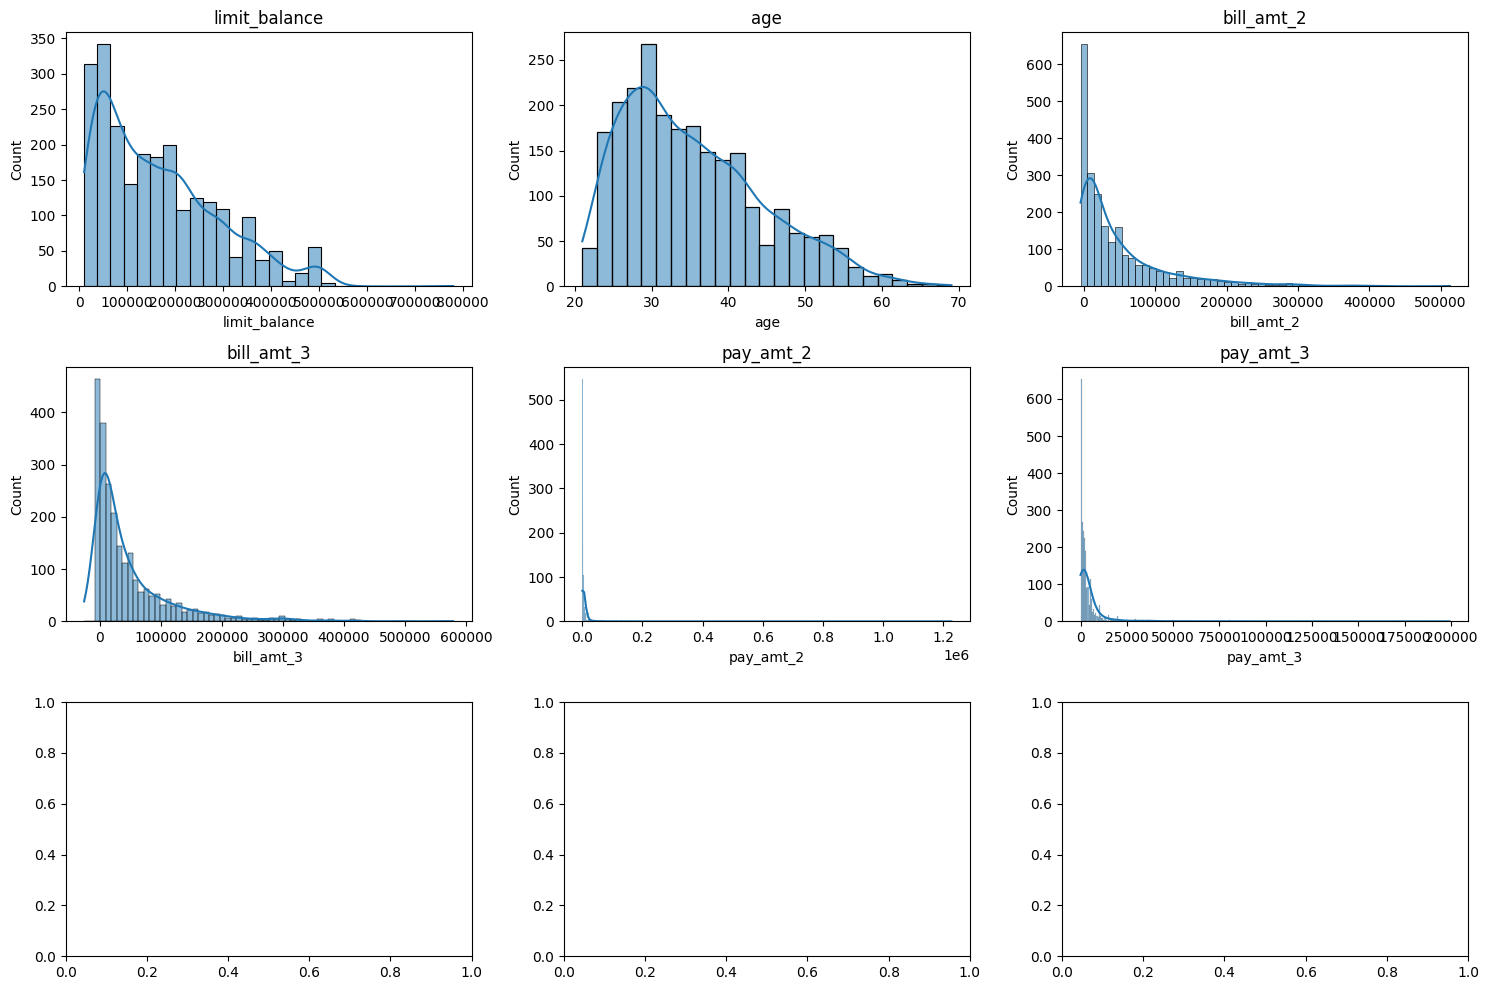

In [26]:
# List of columns for histogram
columns = ["limit_balance", "age", "bill_amt_2", "bill_amt_3", "pay_amt_2", "pay_amt_3"]

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Plot histograms with KDE
for i, column in enumerate(columns):
    sns.histplot(data=X_train, x=column, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(column)

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
#mencari outlier age
Q1 = X_train["age"].quantile(0.25)
Q3 = X_train["age"].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
#melihat outlier
outliers = X_train[(X_train["age"] < lowerBound) | (X_train["age"] > upperBound)]
print("batas atas age: ",upperBound)
outliers

batas atas age:  60.5


limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
1484        70000.0    1                3               3  61.0    3.0    2.0   
1108       290000.0    1                3               1  61.0    0.0    0.0   
1962        70000.0    1                2               2  62.0    6.0    5.0   
2901       230000.0    2                3               1  66.0   -2.0   -2.0   
428         80000.0    1                2               1  61.0    0.0    0.0   
2218       230000.0    1                1               1  61.0   -1.0   -1.0   
1116        50000.0    1                3               1  65.0    0.0    0.0   
811        200000.0    2                2               1  69.0    0.0    0.0   
1189       180000.0    2                3               1  64.0    0.0    0.0   
116        180000.0    1                1               1  63.0    0.0    0.0   
1171        60000.0    2                3               1  63.0    0.0    0.0   
1280       160000.0    1                3               1  62.0    0.0    0.0   
464        140000.0    1                2               2  62.0    0.0    0.0   
639        200000.0    2                2               1  69.0    0.0    0.0   
1957        20000.0    1                2               1  61.0    3.0    4.0   
1714       440000.0    1                1               1  62.0    0.0    0.0   
1191       200000.0    2                3               1  67.0    0.0    0.0   
2517        50000.0    1                2               1  61.0    2.0   -1.0   
2766       280000.0    1                1               1  63.0   -2.0   -2.0   
1463       510000.0    2                3               1  61.0    0.0    0.0   
2804       360000.0    1                1               2  65.0    1.0   -2.0   
410        150000.0    1                2               1  66.0    0.0    0.0   

      pay_3  pay_4  pay_5  ...  bill_amt_3  bill_amt_4  bill_amt_5  \
1484    2.0    0.0    0.0  ...      9511.0     10828.0     11346.0   
1108    0.0    0.0    0.0  ...    296084.0    218399.0    200461.0   
1962    4.0    3.0    2.0  ...     95609.0     86494.0     79359.0   
2901   -2.0   -2.0   -2.0  ...       500.0      1614.0         0.0   
428     0.0    0.0    0.0  ...     73855.0     41003.0     29690.0   
2218   -1.0   -1.0   -1.0  ...      2252.0      4932.0      2783.0   
1116    0.0    0.0    0.0  ...     47942.0     48418.0     49530.0   
811     0.0    0.0    0.0  ...     47952.0     49052.0     49936.0   
1189    0.0    0.0    0.0  ...    125022.0    129079.0    130109.0   
116     0.0    0.0    0.0  ...    130572.0    120464.0    109129.0   
1171    0.0    0.0    0.0  ...     57006.0     28198.0     23888.0   
1280    0.0    0.0    0.0  ...     40460.0     41149.0        -1.0   
464     0.0    0.0    0.0  ...    123491.0    118886.0    117059.0   
639     0.0    0.0    0.0  ...    102998.0    105090.0    107718.0   
1957    3.0    2.0    2.0  ...     17471.0     16893.0     21318.0   
1714    0.0   -1.0    2.0  ...       649.0      1108.0       150.0   
1191    0.0    0.0    0.0  ...    159513.0    150852.0    151996.0   
2517   -1.0   -1.0   -1.0  ...       390.0       390.0       390.0   
2766   -2.0   -2.0   -2.0  ...         0.0         0.0         0.0   
1463    2.0    0.0    0.0  ...    181801.0    178179.0    223100.0   
2804   -2.0   -2.0   -2.0  ...         0.0         0.0         0.0   
410     0.0    0.0    0.0  ...    145132.0    148054.0    146358.0   

      bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
1484     11589.0     1200.0        0.0     1482.0     1000.0      426.0   
1108    204637.0    10492.0    12447.0     8973.0     6761.0     6983.0   
1962     74937.0        0.0        0.0        0.0        0.0     2150.0   
2901      2800.0     5580.0      500.0     1614.0        0.0     2800.0   
428      27596.0     5500.0    10000.0     7003.0     4700.0     3600.0   
2218      7411.0     3710.0     2266.0     7338.0     2791.0     7433.0   
1116  

ada 22 data yang masuk sebagai outlier

In [28]:
# Menyaring outliers dari X_train untuk membuat X_train_no_outliers
X_train_no_outliers = X_train[~X_train["age"].isin(outliers["age"])]
y_train_no_outliers = y_train[~X_train["age"].isin(outliers["age"])]
#melihat perbandingan ukuran antara X_train dengan X_train_no_outliers
print("shape data X_train dengan outlier:",X_train.shape)
print("shape outlier:",outliers.shape)
print("shape data X_train tanpa outlier:",X_train_no_outliers.shape)
print("shape data y_train dengan outlier:",y_train_no_outliers.shape)

shape data X_train dengan outlier: (2371, 23)
shape outlier: (22, 23)
shape data X_train tanpa outlier: (2349, 23)
shape data y_train dengan outlier: (2349,)


In [29]:
#mencari outlier limit_balance
Q1 = X_train_no_outliers["limit_balance"].quantile(0.25)
Q3 = X_train_no_outliers["limit_balance"].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
#melihat outlier
outliers2 = X_train_no_outliers[(X_train_no_outliers["limit_balance"] < lowerBound) | (X_train_no_outliers["limit_balance"] > upperBound)]
print("batas atas limit_balance: ",upperBound)
outliers2

batas atas limit_balance:  525000.0


limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
11         780000.0    1                1               1  48.0    0.0    0.0   
199        560000.0    2                1               2  32.0    0.0    0.0   
2024       750000.0    2                1               1  41.0    0.0    0.0   
1524       530000.0    1                1               2  32.0   -2.0   -2.0   
155        530000.0    2                1               2  39.0    0.0    0.0   

      pay_3  pay_4  pay_5  ...  bill_amt_3  bill_amt_4  bill_amt_5  \
11      0.0    0.0    0.0  ...    190663.0    195124.0    184872.0   
199     0.0    0.0    0.0  ...     23991.0     15488.0     12579.0   
2024    0.0    0.0   -1.0  ...     92767.0     75696.0     35485.0   
1524   -1.0    0.0    0.0  ...     15688.0     24511.0     12144.0   
155     0.0    0.0    0.0  ...    364298.0    345867.0    346676.0   

      bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
11      191090.0    10000.0    15004.0    10000.0     8000.0    10028.0   
199      11400.0     1548.0     1446.0    14720.0      427.0     1000.0   
2024      4889.0     6817.0     2330.0     2705.0    50854.0     4913.0   
1524     34963.0    24120.0    15791.0    12808.0     8090.0    34110.0   
155     352736.0    17045.0    14089.0    11962.0    11763.0    12557.0   

      pay_amt_6  
11       7003.0  
199       300.0  
2024      550.0  
1524    90231.0  
155     12496.0  

[5 rows x 23 columns]

saya tidak akan drop tapi saya akan winsorized karena menurutsaya jumlahnya hanya sedikit dan mungkin akan membantu untuk pembuatan model 

In [30]:
# Kolom-kolom yang akan diwinsorize
columns_to_winsorize = ['limit_balance',"bill_amt_1", "bill_amt_2","bill_amt_3", "bill_amt_4", "bill_amt_5", "bill_amt_6",
                         "pay_amt_1", "pay_amt_2","pay_amt_3","pay_amt_4","pay_amt_5","pay_amt_6"]

In [31]:
#Copydata 
X_train_no_outliers2=X_train_no_outliers.copy()

In [32]:
#winsorize kolom
for col in columns_to_winsorize:
    winsorized_col = winsorize(X_train_no_outliers2[col], limits=[0.05, 0.05])
    X_train_no_outliers2[col] = winsorized_col

In [33]:
X_train_no_outliers.skew()

limit_balance       0.900832
sex                -0.469953
education_level     0.873485
marital_status     -0.037044
age                 0.641735
pay_0               0.943818
pay_2               0.850925
pay_3               0.903065
pay_4               0.981216
pay_5               0.949313
pay_6               0.853477
bill_amt_1          2.504890
bill_amt_2          2.484481
bill_amt_3          2.606290
bill_amt_4          2.453506
bill_amt_5          2.423684
bill_amt_6          2.463331
pay_amt_1          11.786628
pay_amt_2          29.000119
pay_amt_3           7.909432
pay_amt_4           8.359164
pay_amt_5          11.798091
pay_amt_6           9.649763
dtype: float64

In [34]:
X_train_no_outliers2.skew()

limit_balance      0.604146
sex               -0.469953
education_level    0.873485
marital_status    -0.037044
age                0.641735
pay_0              0.943818
pay_2              0.850925
pay_3              0.903065
pay_4              0.981216
pay_5              0.949313
pay_6              0.853477
bill_amt_1         1.399081
bill_amt_2         1.455551
bill_amt_3         1.454440
bill_amt_4         1.441484
bill_amt_5         1.440107
bill_amt_6         1.398099
pay_amt_1          1.844593
pay_amt_2          1.892829
pay_amt_3          2.043459
pay_amt_4          1.674761
pay_amt_5          1.799003
pay_amt_6          2.196019
dtype: float64

Untuk penentuan menggunakan data dengan outlier atau tidak saya pertama-tama akan mengetes ke 2 data train dengan model menggunakan logistic regression. saya menganggap logistic regression cocok untuk dijadikan sebagai pembanding karena walaupun logistic tidak tahan dengan outlier sehingga membuat hasil dari data dengan outlier menjadi lebih jelek daripada tanpa outlier, tetapi saat EDA terlihat dari pairplot bahwa antar fitur memiliki garis yang linear dan saya juga akan menggunakan robust scaler untuk scaling data dengan outlier

## 7. Feature Scaling and Feature Selection

In [35]:
#buat list kolom yang akan di scaling dan tidak
scale_columns = ['limit_balance',"bill_amt_1", "bill_amt_2","bill_amt_3", "bill_amt_4", 
                        "bill_amt_5", "bill_amt_6","pay_amt_1", "pay_amt_2","pay_amt_3",
                        "pay_amt_4","pay_amt_5","pay_amt_6"]
norm_columns = ['sex','education_level','marital_status','pay_0','pay_2','pay_3','pay_4',
                'pay_5','pay_6']


In [36]:
#definisikan scaler
scaler_robust=RobustScaler()
scaler_standard=StandardScaler()

In [37]:
#splitting data yang akan di scaling atau tidak
X_train_scaled=X_train[scale_columns]
X_test_scaled= X_test[scale_columns]

X_train_norm=X_train[norm_columns]
X_test_norm= X_test[norm_columns]
X_train_scaled.head(1)


limit_balance  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
1045        50000.0     17946.0     18946.0     21904.0     21243.0   

      bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
1045     20225.0     19850.0     1306.0     3264.0        0.0      846.0   

      pay_amt_5  pay_amt_6  
1045      856.0      804.0

In [38]:
#scaling data
scaler_robust.fit(X_train_scaled)
X_train_rob_scaled=scaler_robust.transform(X_train_scaled)
X_test_rob_scaled= scaler_robust.transform(X_test_scaled)
X_train_rob_scaled

array([[-0.47368421, -0.09256016, -0.06763503, ..., -0.22463081,
        -0.21649082, -0.22464586],
       [ 0.84210526,  0.25625774,  0.73983961, ...,  0.26663054,
        13.73114498, 12.61125736],
       [-0.05263158,  0.85503789,  1.08761034, ...,  0.35902994,
         2.16568972,  0.45129748],
       ...,
       [-0.47368421,  0.3431414 ,  0.35516152, ..., -0.15580545,
        -0.17897616, -0.17550458],
       [-0.15789474, -0.33802349, -0.35559627, ...,  0.49695163,
        -0.43949459,  0.87551711],
       [ 0.47368421, -0.36349226, -0.36180702, ..., -0.45386804,
        -0.43949459, -0.4262254 ]])

In [39]:
#splitting data tanpa outlier yang akan di scaling atau tidak
X_train_scaled_no_outliers=X_train_no_outliers2[scale_columns]
X_test_scaled_no_outliers= X_test[scale_columns]

X_train_norm_no_outliers=X_train_no_outliers2[norm_columns]
X_test_norm_no_outliers= X_test[norm_columns]
X_train_scaled_no_outliers.head(1)

limit_balance  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
1045        50000.0     17946.0     18946.0     21904.0     21243.0   

      bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
1045     20225.0     19850.0     1306.0     3264.0        0.0      846.0   

      pay_amt_5  pay_amt_6  
1045      856.0      804.0

In [40]:
# scaling data tanpa outlier dengan standard scaler
scaler_standard.fit(X_train_scaled_no_outliers)

X_train_standard_scaled=scaler_standard.transform(X_train_scaled_no_outliers)
X_test_standard_scaled= scaler_standard.transform(X_test_scaled_no_outliers)
X_train_standard_scaled

array([[-9.69471501e-01, -5.21069072e-01, -4.89204703e-01, ...,
        -5.82353033e-01, -5.70778719e-01, -5.33787973e-01],
       [ 1.19418197e+00, -1.24353901e-01,  4.15230288e-01, ...,
        -9.42560908e-02,  3.05340781e+00,  3.33692300e+00],
       [-2.77102389e-01,  5.56646624e-01,  8.04760812e-01, ...,
        -2.45186727e-03,  1.76826431e+00,  1.72436443e-02],
       ...,
       [-9.69471501e-01, -2.55399726e-02, -1.56393765e-02, ...,
        -5.13971001e-01, -5.33943395e-01, -4.93727811e-01],
       [-4.50194667e-01, -8.00237736e-01, -8.11743908e-01, ...,
         1.34581416e-01, -7.89744251e-01,  3.63069125e-01],
       [ 5.88359001e-01, -8.29203695e-01, -8.18700431e-01, ...,
        -8.10113658e-01, -7.89744251e-01, -6.98116393e-01]])

#### Concat Data Dengan Outlier

In [41]:
# concate colum 
X_train_final= np.concatenate([X_train_rob_scaled,X_train_norm], axis=1)
X_test_final= np.concatenate([X_test_rob_scaled,X_test_norm], axis=1)
X_train_final

array([[-0.47368421, -0.09256016, -0.06763503, ...,  2.        ,
         0.        ,  0.        ],
       [ 0.84210526,  0.25625774,  0.73983961, ..., -1.        ,
         0.        , -1.        ],
       [-0.05263158,  0.85503789,  1.08761034, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.47368421,  0.3431414 ,  0.35516152, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15789474, -0.33802349, -0.35559627, ..., -1.        ,
        -1.        ,  0.        ],
       [ 0.47368421, -0.36349226, -0.36180702, ..., -2.        ,
        -2.        , -2.        ]])

In [42]:
# membuat DataFrame dari data yang sudah digabungkan
X_train_final_df = pd.DataFrame(X_train_final, columns=[scale_columns + norm_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[scale_columns + norm_columns])
X_train_final_df

limit_balance bill_amt_1 bill_amt_2 bill_amt_3 bill_amt_4 bill_amt_5  \
0        -0.473684  -0.092560  -0.067635   0.009351   0.030137   0.027213   
1         0.842105   0.256258   0.739840  -0.040715  -0.063182  -0.311450   
2        -0.052632   0.855038   1.087610   0.783075   0.880934   0.691655   
3         1.894737  -0.248860  -0.227344  -0.357053   0.194301  -0.340206   
4         0.736842  -0.305172   0.951781   0.776501   0.781957   0.810900   
...            ...        ...        ...        ...        ...        ...   
2366      0.052632   1.890169   1.844825   2.067580   2.148981   2.406762   
2367      0.842105   0.189906   0.223121   0.324484   0.384593   0.413666   
2368     -0.473684   0.343141   0.355162   0.431676   0.491464   0.032806   
2369     -0.157895  -0.338023  -0.355596  -0.352035  -0.330315  -0.295173   
2370      0.473684  -0.363492  -0.361807  -0.357053  -0.346669  -0.362847   

     bill_amt_6  pay_amt_1 pay_amt_2 pay_amt_3  ...  pay_amt_6  sex  \
0      0.024834  -0.251685  0.263177 -0.478537  ...  -0.224646  1.0   
1      0.758348  16.895969  4.167183  3.436098  ...  12.611257  2.0   
2      0.807681   6.290161  0.321716  0.253171  ...   0.451297  2.0   
3     -0.366087   1.554711 -0.546447  6.960000  ...  -0.225649  2.0   
4      0.821762  21.311604 -0.002729 -0.015366  ...  -0.047386  1.0   
...         ...        ...       ...       ...  ...        ...  ...   
2366   2.323588   0.404607  0.402332  0.341220  ...   0.330951  2.0   
2367   0.476569  -0.099007  0.445740 -0.125854  ...  -0.426225  2.0   
2368   0.016050  -0.081608  0.768200 -0.112683  ...  -0.175505  1.0   
2369  -0.327113  -0.473716 -0.472033 -0.253659  ...   0.875517  2.0   
2370  -0.366087  -0.571744 -0.546447 -0.478537  ...  -0.426225  1.0   

     education_level marital_status pay_0 pay_2 pay_3 pay_4 pay_5 pay_6  
0                2.0            1.0   2.0   0.0   0.0   2.0   0.0   0.0  
1                2.0            1.0  -1.0  -1.0  -1.0  -1.0   0.0  -1.0  
2                2.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
3                2.0            1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  
4                2.0            1.0  -1.0  -1.0   0.0   0.0   0.0   0.0  
...              ...            ...   ...   ...   ...   ...   ...   ...  
2366             3.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2367             3.0            1.0   2.0   0.0   0.0   2.0   2.0   2.0  
2368             2.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2369             2.0            2.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0  
2370             1.0            1.0   1.0  -2.0  -2.0  -2.0  -2.0  -2.0  

[2371 rows x 22 columns]

#### concat data tanpa outlier

In [43]:
# concate colum 
X_train_final_no_outliers= np.concatenate([X_train_standard_scaled,X_train_norm_no_outliers], axis=1)
X_test_final_no_outliers= np.concatenate([X_test_standard_scaled,X_test_norm_no_outliers], axis=1)
X_train_final_no_outliers

array([[-0.9694715 , -0.52106907, -0.4892047 , ...,  2.        ,
         0.        ,  0.        ],
       [ 1.19418197, -0.1243539 ,  0.41523029, ..., -1.        ,
         0.        , -1.        ],
       [-0.27710239,  0.55664662,  0.80476081, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.9694715 , -0.02553997, -0.01563938, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45019467, -0.80023774, -0.81174391, ..., -1.        ,
        -1.        ,  0.        ],
       [ 0.588359  , -0.8292037 , -0.81870043, ..., -2.        ,
        -2.        , -2.        ]])

In [44]:
# membuat DataFrame dari data yang sudah digabungkan
X_train_final_no_outliers = pd.DataFrame(X_train_final_no_outliers, columns=[scale_columns + norm_columns])
X_test_final_no_outliers = pd.DataFrame(X_test_final_no_outliers, columns=[scale_columns + norm_columns])
X_train_final_no_outliers

limit_balance bill_amt_1 bill_amt_2 bill_amt_3 bill_amt_4 bill_amt_5  \
0        -0.969472  -0.521069  -0.489205  -0.413358  -0.389715  -0.373014   
1         1.194182  -0.124354   0.415230  -0.468510  -0.494625  -0.746701   
2        -0.277102   0.556647   0.804761   0.438960   0.566758   0.360144   
3         2.059643  -0.698831  -0.668092  -0.816981  -0.205161  -0.778431   
4         1.021090  -0.762876   0.652622   0.431718   0.455487   0.491722   
...            ...        ...        ...        ...        ...        ...   
2344     -0.104010   1.733915   1.652900   1.853944   1.992305   2.252626   
2345      1.194182  -0.199816  -0.163535  -0.066214   0.008767   0.053406   
2346     -0.969472  -0.025540  -0.015639   0.051866   0.128912  -0.366843   
2347     -0.450195  -0.800238  -0.811744  -0.811453  -0.794937  -0.728741   
2348      0.588359  -0.829204  -0.818700  -0.816981  -0.813323  -0.803414   

     bill_amt_6 pay_amt_1 pay_amt_2 pay_amt_3  ... pay_amt_6  sex  \
0     -0.365240 -0.573871 -0.169720 -0.744452  ... -0.533788  1.0   
1      0.460430  3.102739  2.904119  2.584063  ...  3.336923  2.0   
2      0.515961  3.102739 -0.123629 -0.122300  ...  0.017244  2.0   
3     -0.805276  0.895218 -0.807181  3.195846  ... -0.534606  2.0   
4      0.531811  3.102739 -0.379082 -0.350630  ... -0.389285  1.0   
...         ...       ...       ...       ...  ...       ...  ...   
2344   2.222323 -0.040128 -0.060156 -0.047434  ... -0.080863  2.0   
2345   0.143250 -0.449703 -0.025978 -0.444575  ... -0.698116  2.0   
2346  -0.375127 -0.435552  0.227913 -0.433376  ... -0.493728  1.0   
2347  -0.761405 -0.754443 -0.748591 -0.553244  ...  0.363069  2.0   
2348  -0.805276 -0.834165 -0.807181 -0.744452  ... -0.698116  1.0   

     education_level marital_status pay_0 pay_2 pay_3 pay_4 pay_5 pay_6  
0                2.0            1.0   2.0   0.0   0.0   2.0   0.0   0.0  
1                2.0            1.0  -1.0  -1.0  -1.0  -1.0   0.0  -1.0  
2                2.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
3                2.0            1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  
4                2.0            1.0  -1.0  -1.0   0.0   0.0   0.0   0.0  
...              ...            ...   ...   ...   ...   ...   ...   ...  
2344             3.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2345             3.0            1.0   2.0   0.0   0.0   2.0   2.0   2.0  
2346             2.0            1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2347             2.0            2.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0  
2348             1.0            1.0   1.0  -2.0  -2.0  -2.0  -2.0  -2.0  

[2349 rows x 22 columns]

### Feature Selection

> Analisis sebelum feature selection

- 

In [45]:
# membuat data frame
train_temp = pd.DataFrame(X_train_final, columns=[scale_columns + norm_columns])
train_temp.head(1)

limit_balance bill_amt_1 bill_amt_2 bill_amt_3 bill_amt_4 bill_amt_5  \
0     -0.473684   -0.09256  -0.067635   0.009351   0.030137   0.027213   

  bill_amt_6 pay_amt_1 pay_amt_2 pay_amt_3  ... pay_amt_6  sex  \
0   0.024834 -0.251685  0.263177 -0.478537  ... -0.224646  1.0   

  education_level marital_status pay_0 pay_2 pay_3 pay_4 pay_5 pay_6  
0             2.0            1.0   2.0   0.0   0.0   2.0   0.0   0.0  

[1 rows x 22 columns]

In [46]:
#melihat urutan y_train
y_train.head(10)

1045    0
1628    0
870     0
2394    0
1089    0
2656    0
1209    0
316     1
1363    0
1998    1
Name: default_payment_next_month, dtype: int64

In [47]:
#copy y_train karena akan di reset index karena akan digabung dengan train_temp
y_train_temp=y_train.copy()

In [48]:
#reset index
y_train_temp.reset_index(drop=True, inplace=True)

In [49]:
#lihat urutan y_train_temp
y_train_temp.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: default_payment_next_month, dtype: int64

setelah di reset index isi tetap sama seperti yang belum direset index

In [50]:
#concat sementara untuk melihat corr
train_temp1=pd.concat([train_temp,y_train_temp], axis=1)
train_temp1

(limit_balance,)  (bill_amt_1,)  (bill_amt_2,)  (bill_amt_3,)  \
0            -0.473684      -0.092560      -0.067635       0.009351   
1             0.842105       0.256258       0.739840      -0.040715   
2            -0.052632       0.855038       1.087610       0.783075   
3             1.894737      -0.248860      -0.227344      -0.357053   
4             0.736842      -0.305172       0.951781       0.776501   
...                ...            ...            ...            ...   
2366          0.052632       1.890169       1.844825       2.067580   
2367          0.842105       0.189906       0.223121       0.324484   
2368         -0.473684       0.343141       0.355162       0.431676   
2369         -0.157895      -0.338023      -0.355596      -0.352035   
2370          0.473684      -0.363492      -0.361807      -0.357053   

      (bill_amt_4,)  (bill_amt_5,)  (bill_amt_6,)  (pay_amt_1,)  (pay_amt_2,)  \
0          0.030137       0.027213       0.024834     -0.251685      0.263177   
1         -0.063182      -0.311450       0.758348     16.895969      4.167183   
2          0.880934       0.691655       0.807681      6.290161      0.321716   
3          0.194301      -0.340206      -0.366087      1.554711     -0.546447   
4          0.781957       0.810900       0.821762     21.311604     -0.002729   
...             ...            ...            ...           ...           ...   
2366       2.148981       2.406762       2.323588      0.404607      0.402332   
2367       0.384593       0.413666       0.476569     -0.099007      0.445740   
2368       0.491464       0.032806       0.016050     -0.081608      0.768200   
2369      -0.330315      -0.295173      -0.327113     -0.473716     -0.472033   
2370      -0.346669      -0.362847      -0.366087     -0.571744     -0.546447   

      (pay_amt_3,)  ...  (sex,)  (education_level,)  (marital_status,)  \
0        -0.478537  ...     1.0                 2.0                1.0   
1         3.436098  ...     2.0                 2.0                1.0   
2         0.253171  ...     2.0                 2.0                1.0   
3         6.960000  ...     2.0                 2.0                1.0   
4        -0.015366  ...     1.0                 2.0                1.0   
...            ...  ...     ...                 ...                ...   
2366      0.341220  ...     2.0                 3.0                1.0   
2367     -0.125854  ...     2.0                 3.0                1.0   
2368     -0.112683  ...     1.0                 2.0                1.0   
2369     -0.253659  ...     2.0                 2.0                2.0   
2370     -0.478537  ...     1.0                 1.0                1.0   

      (pay_0,)  (pay_2,)  (pay_3,)  (pay_4,)  (pay_5,)  (pay_6,)  \
0          2.0       0.0       0.0       2.0       0.0       0.0   
1         -1.0      -1.0      -1.0      -1.0       0.0      -1.0   
2          0.0       0.0       0.0       0.0       0.0       0.0   
3         -1.0      -1.0      -1.0      -1.0      -1.0      -1.0   
4         -1.0      -1.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...   
2366       0.0       0.0       0.0       0.0       0.0       0.0   
2367       2.0       0.0       0.0       2.0       2.0       2.0   
2368       0.0       0.0       0.0       0.0       0.0       0.0   
2369      -1.0      -1.0      -1.0      -1.0      -1.0       0.0   
2370       1.0      -2.0      -2.0      -2.0      -2.0      -2.0   

      default_payment_next_month  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
2366                           0  
2367                           0  
2368                           0  
2369                           1  
2370                           0  

[2371 rows x 23 columns]

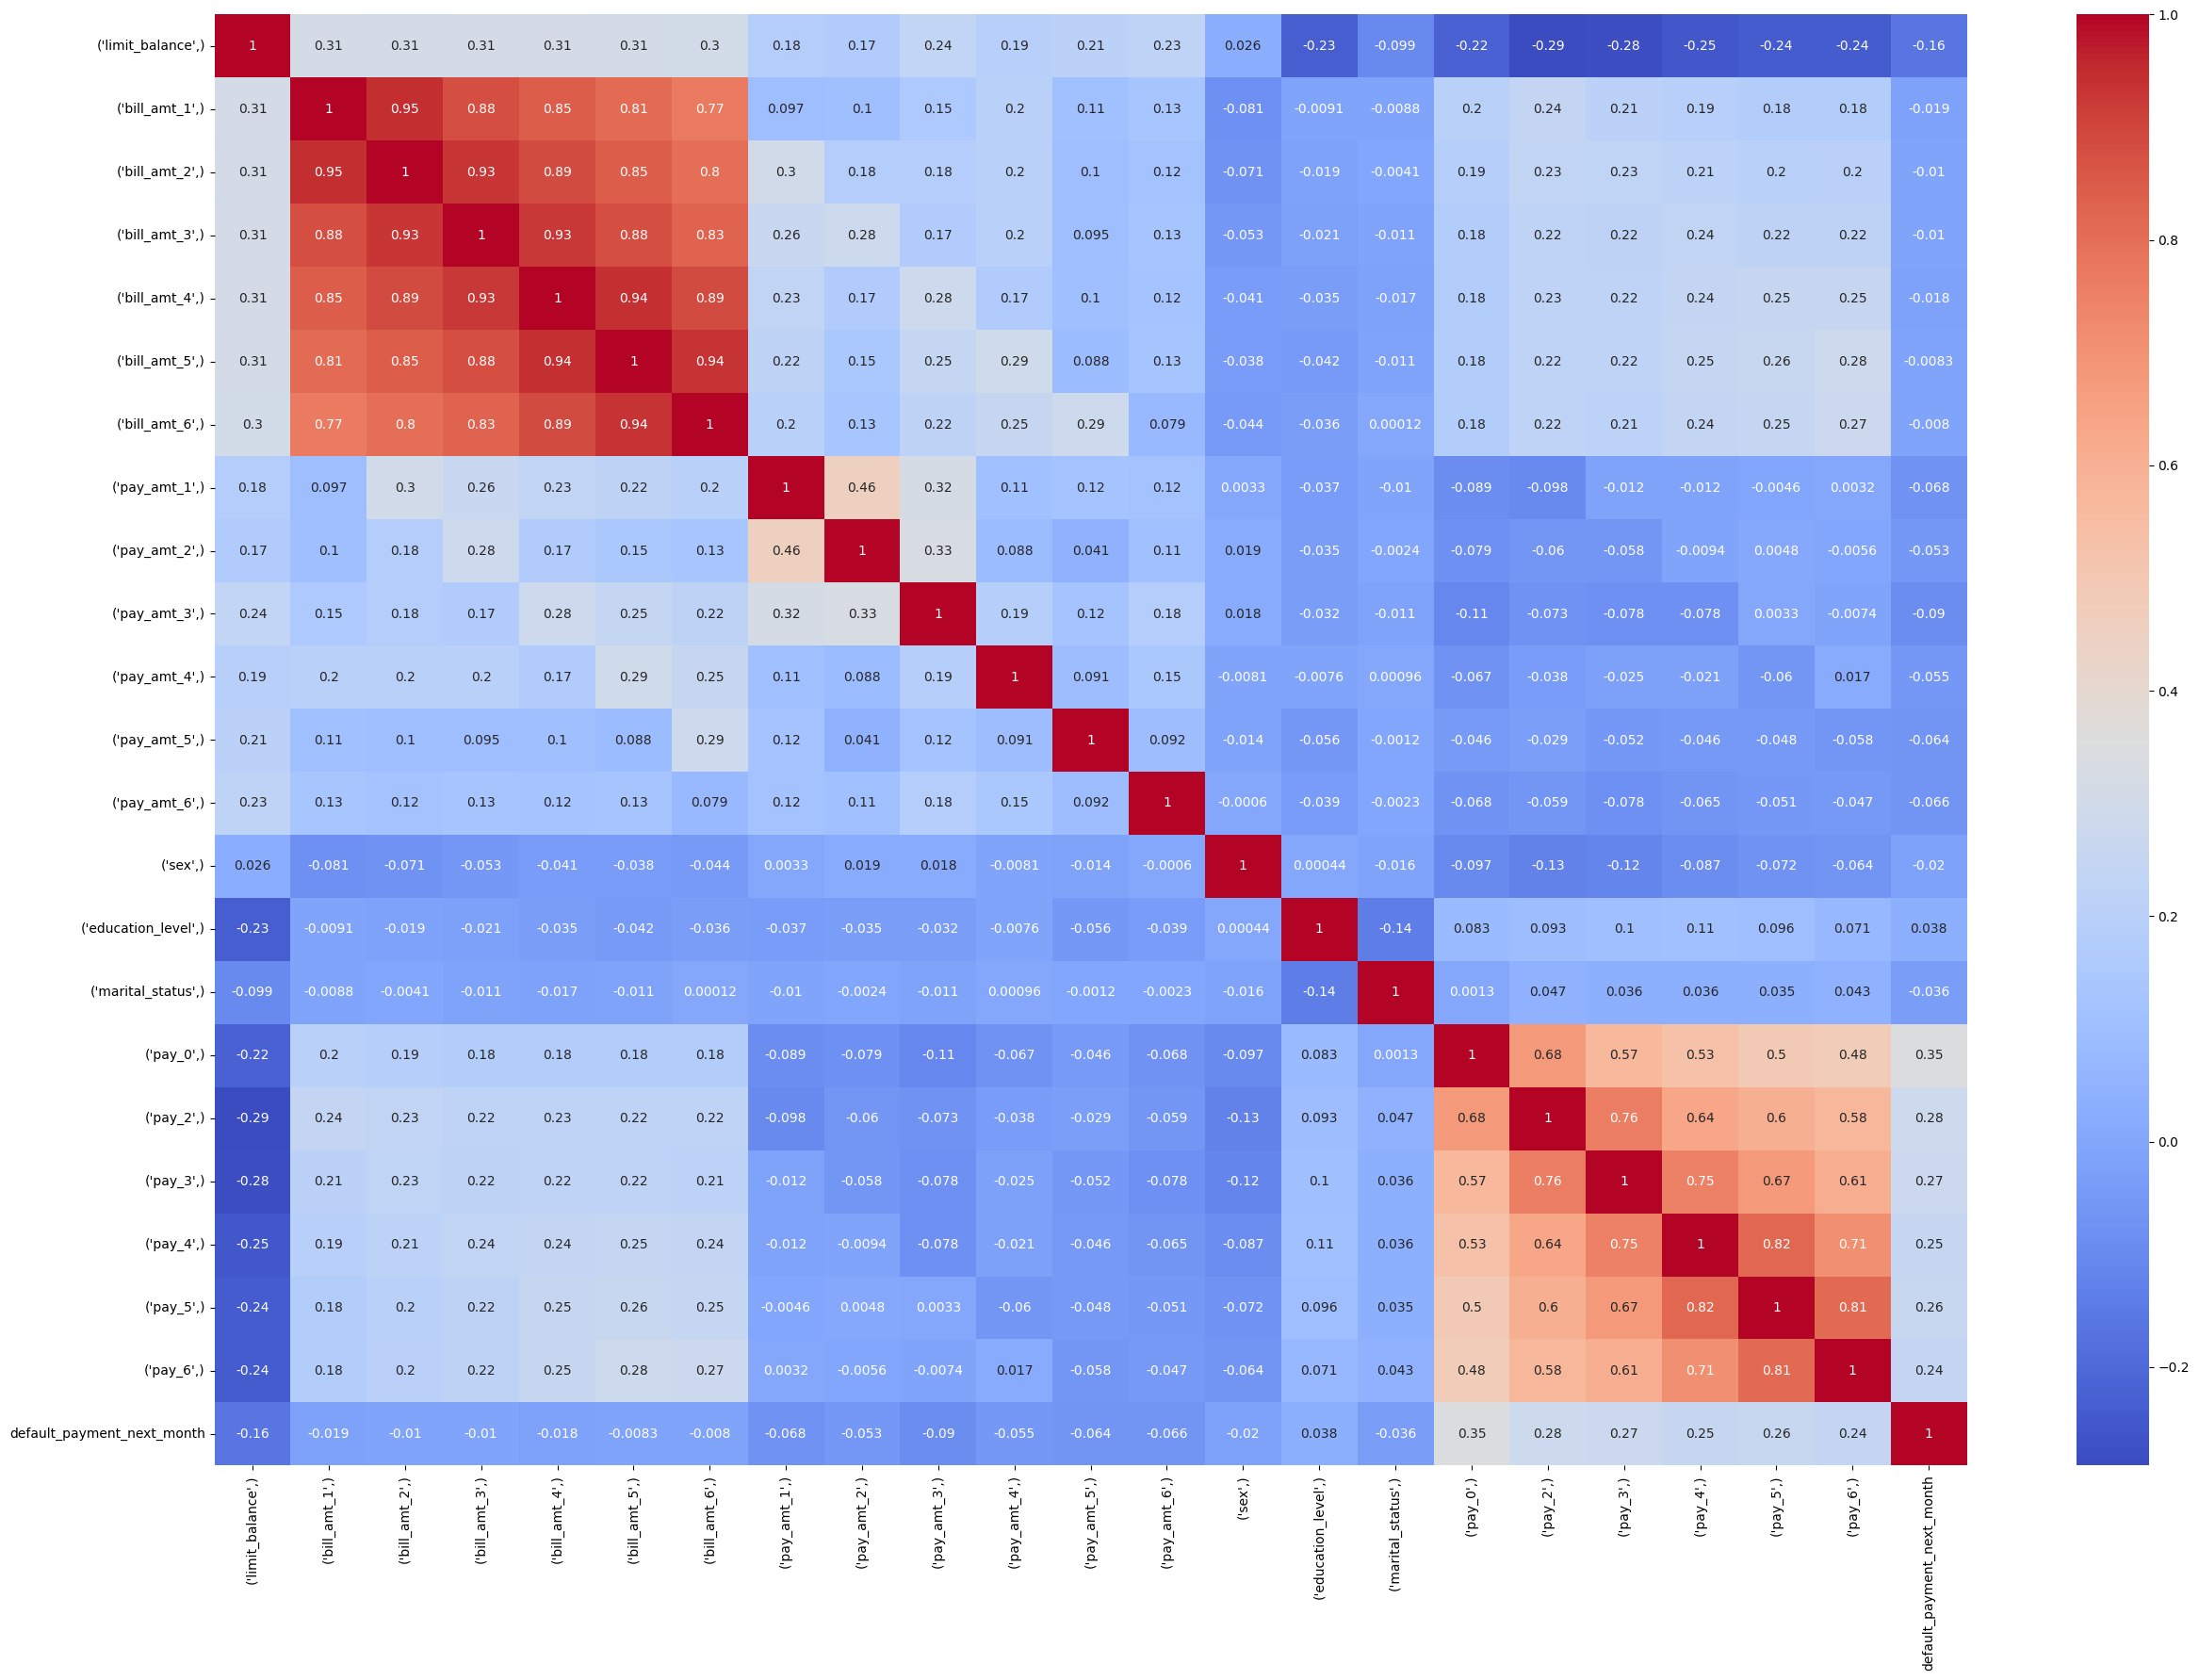

In [51]:
#membuat visualisasi Korelasi antar kolom
heatmap_train_temp1=train_temp1.corr()
fig, ax=plt.subplots(figsize=(30,20))
sns.heatmap(heatmap_train_temp1, annot=True, cmap="coolwarm",ax=ax)
plt.show()

In [52]:
#buat menjadi tabel agar lebih terlihat
train_temp1.corr()

(limit_balance,)  (bill_amt_1,)  (bill_amt_2,)  \
(limit_balance,)                    1.000000       0.311330       0.310559   
(bill_amt_1,)                       0.311330       1.000000       0.948443   
(bill_amt_2,)                       0.310559       0.948443       1.000000   
(bill_amt_3,)                       0.311488       0.883438       0.931595   
(bill_amt_4,)                       0.312692       0.848653       0.889339   
(bill_amt_5,)                       0.306186       0.809110       0.848478   
(bill_amt_6,)                       0.301534       0.768273       0.801199   
(pay_amt_1,)                        0.180847       0.096834       0.299351   
(pay_amt_2,)                        0.167893       0.100192       0.183980   
(pay_amt_3,)                        0.236893       0.154923       0.182420   
(pay_amt_4,)                        0.193373       0.196857       0.197984   
(pay_amt_5,)                        0.206313       0.105575       0.099538   
(pay_amt_6,)                        0.225228       0.131590       0.117826   
(sex,)                              0.026331      -0.080620      -0.071349   
(education_level,)                 -0.233880      -0.009064      -0.018568   
(marital_status,)                  -0.098967      -0.008783      -0.004053   
(pay_0,)                           -0.223427       0.195512       0.189735   
(pay_2,)                           -0.287460       0.243269       0.233567   
(pay_3,)                           -0.279672       0.206308       0.230320   
(pay_4,)                           -0.252763       0.191622       0.213940   
(pay_5,)                           -0.240720       0.175952       0.199367   
(pay_6,)                           -0.238492       0.179138       0.204647   
default_payment_next_month         -0.164947      -0.019443      -0.010146   

                            (bill_amt_3,)  (bill_amt_4,)  (bill_amt_5,)  \
(limit_balance,)                 0.311488       0.312692       0.306186   
(bill_amt_1,)                    0.883438       0.848653       0.809110   
(bill_amt_2,)                    0.931595       0.889339       0.848478   
(bill_amt_3,)                    1.000000       0.927561       0.883904   
(bill_amt_4,)                    0.927561       1.000000       0.944327   
(bill_amt_5,)                    0.883904       0.944327       1.000000   
(bill_amt_6,)                    0.834021       0.887960       0.937527   
(pay_amt_1,)                     0.264684       0.234590       0.219676   
(pay_amt_2,)                     0.284907       0.166137       0.148172   
(pay_amt_3,)                     0.167519       0.284242       0.249988   
(pay_amt_4,)                     0.198254       0.170093       0.291931   
(pay_amt_5,)                     0.095487       0.100120       0.088148   
(pay_amt_6,)                     0.129466       0.124484       0.127249   
(sex,)                          -0.053364      -0.040542      -0.038280   
(education_level,)              -0.021224      -0.035396      -0.041584   
(marital_status,)               -0.010957      -0.017128      -0.011360   
(pay_0,)                         0.180198       0.178531       0.178511   
(pay_2,)                         0.223349       0.225332       0.221844   
(pay_3,)                         0.218110       0.221972       0.222517   
(pay_4,)                         0.235264       0.243791       0.248195   
(pay_5,)                         0.220182       0.251003       0.256524   
(pay_6,)                         0.220355       0.254517       0.282932   
default_payment_next_month      -0.010089      -0.018255      -0.008320   

                            (bill_amt_6,)  (pay_amt_1,)  (pay_amt_2,)  \
(limit_balance,)                 0.301534      0.180847      0.167893   
(bill_amt_1,)                    0.768273      0.096834      0.100192   
(bill_amt_2,)                    0.801199      0.299351      0.183980   
(bill_amt_3,)                    0.834021      0.264684      0

berdasarkan korelasi pearson kolom yang memiliki korelasi terhadap target yang paling beasr adalah kolom pay di 02 sampai 0.3 tetapi menurut saya kolom yang lain juga dibutuhkan oleh karena itu saya berdasarkan __pendapat pribadi__ memutuskan untuk mengambil kolom seluruh kolom kategorik yang di encode dan masing-masing 2 untuk pay,bill_amt, dan pay_amt karena 6 dengan kolom yang hampir sama akan model semakin kompleks dan ditakutkan akan membuat model cenderung overfitting

## 8. Final Feature

In [53]:
features=["limit_balance","sex","education_level","marital_status","pay_2",
            "pay_3","bill_amt_2","bill_amt_3","pay_amt_2","pay_amt_3"]
features

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'pay_2',
 'pay_3',
 'bill_amt_2',
 'bill_amt_3',
 'pay_amt_2',
 'pay_amt_3']

In [54]:
# final train untuk data set dengan outlier
X_train_final_reduced_features= X_train_final_df[features]
X_test_final_reduced_features= X_test_final_df[features]
X_test_final_reduced_features.head(2)

limit_balance  sex education_level marital_status pay_2 pay_3 bill_amt_2  \
0     -0.526316  1.0             3.0            1.0  -2.0  -2.0  -0.361807   
1     -0.421053  2.0             2.0            1.0   0.0   0.0   0.222096   

  bill_amt_3 pay_amt_2 pay_amt_3  
0  -0.357053 -0.546447 -0.478537  
1   0.231579 -0.131217 -0.132195

In [55]:
# final train untuk data set tanpa outlier
X_train_final_reduced_features_no_outliers= X_train_final_no_outliers[features]
X_test_final_reduced_features_no_outliers= X_test_final_no_outliers[features]
X_test_final_reduced_features_no_outliers.head(2)

limit_balance  sex education_level marital_status pay_2 pay_3 bill_amt_2  \
0     -1.056018  1.0             3.0            1.0  -2.0  -2.0  -0.818700   
1     -0.882925  2.0             2.0            1.0   0.0   0.0  -0.164683   

  bill_amt_3 pay_amt_2 pay_amt_3  
0  -0.816981 -0.807181 -0.744452  
1  -0.168557 -0.480248 -0.449967

## 9. Base Model Definition

### Data Dengan Outlier

In [56]:
#menginisialisasi base model 
model_log= LogisticRegression()
model_svm= SVC()
model_rf= RandomForestClassifier()
model_dt= DecisionTreeClassifier()
model_knn= KNeighborsClassifier()
model_nb= GaussianNB()
model_grad=GradientBoostingClassifier()

In [57]:
model_log.fit(X_train_final_reduced_features, y_train_temp)

LogisticRegression()

In [58]:
# model log
y_pred_train_log = model_log.predict(X_train_final_reduced_features)
y_pred_test_log = model_log.predict(X_test_final_reduced_features)

In [59]:
#melihat score model logistic regression
print('classification Train Set Log : \n', classification_report(y_train, y_pred_train_log))
print('classification Test Set  Log: \n', classification_report(y_test, y_pred_test_log))


classification Train Set Log : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1863
           1       0.69      0.20      0.32       508

    accuracy                           0.81      2371
   macro avg       0.75      0.59      0.60      2371
weighted avg       0.79      0.81      0.77      2371

classification Test Set  Log: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       466
           1       0.72      0.23      0.35       127

    accuracy                           0.82       593
   macro avg       0.77      0.60      0.62       593
weighted avg       0.80      0.82      0.78       593



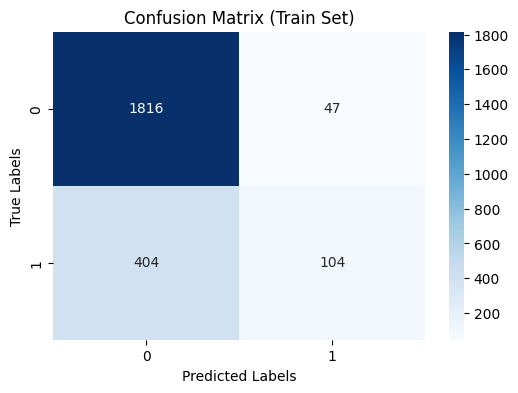

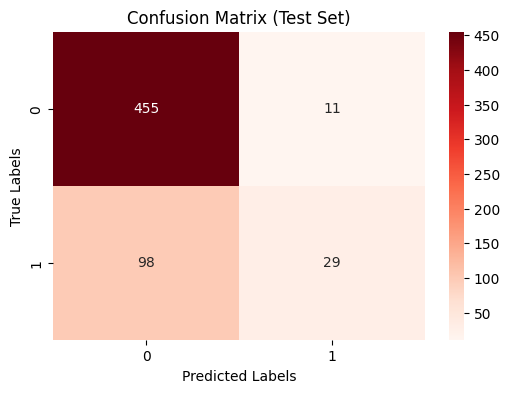

In [60]:
# Confusion matrix untuk train set log reg tuned
cm_train = confusion_matrix(y_train, y_pred_train_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set log reg tuned
cm_train = confusion_matrix(y_test, y_pred_test_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> evaluasi Model log reg dengan data yang tidak handling outlier
1. Model ini memprediksi test set TP sebesar 29, TN 455, FN 98, dan FP 11

2. Model bersifat underfitting

3. Model cenderung memprediksikan Negative/0

### Data tanpa Outlier

In [61]:
model_log.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)

LogisticRegression()

In [62]:
# model log
y_pred_train_log_no_outliers = model_log.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_log_no_outliers = model_log.predict(X_test_final_reduced_features_no_outliers)

In [63]:
#melihat score model logistic regression
print('classification Train Set Log no outliers : \n', classification_report(y_train_no_outliers, y_pred_train_log_no_outliers))
print('classification Test Set  Log no outliers: \n', classification_report(y_test, y_pred_test_log_no_outliers))


classification Train Set Log no outliers : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1845
           1       0.67      0.22      0.33       504

    accuracy                           0.81      2349
   macro avg       0.75      0.60      0.61      2349
weighted avg       0.79      0.81      0.77      2349

classification Test Set  Log no outliers: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       466
           1       0.74      0.27      0.39       127

    accuracy                           0.82       593
   macro avg       0.78      0.62      0.64       593
weighted avg       0.81      0.82      0.79       593



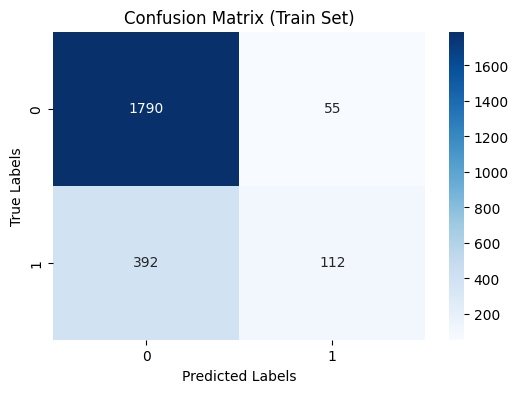

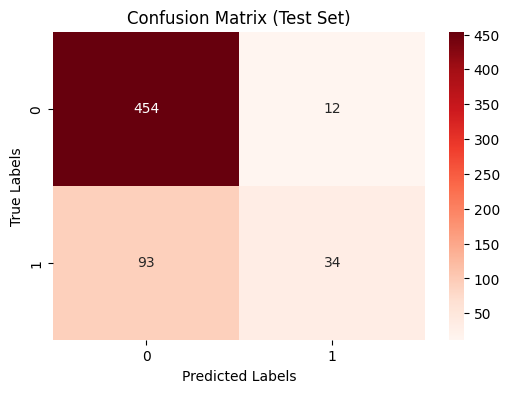

In [64]:
# Confusion matrix untuk train set log reg tuned
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_log_no_outliers)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set log reg tuned
cm_train = confusion_matrix(y_test, y_pred_test_log_no_outliers)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

>Evaluasi Ke2 model dengan memakai data yang berbeda

1. Model ini memprediksi test set TP sebesar 34, TN 454, FN 93, dan FP 12

2. Model bersifat underfitting

3. Model cenderung memprediksikan Negative/0

4. karena tujuan utama adalah meminimalkan false negative( orang yang terprediksi akan default padahal tidak) dan memaksimalkan True Positive
(orang yang diprediksi akan default dan kenyataanya memang begitu). maka pemodelan dengan data yang outliernya sudah di handling lebih baik dibandingkan data yang belum dihandling outliernya

5. __saya akan menggunakan data yang sudah di handling outliernya untuk pemodelan berikutnya__


## 10. Base Model Training

In [65]:
#training model
model_svm.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)
model_rf.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)
model_dt.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)
model_knn.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)
model_nb.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)
model_grad.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)

GradientBoostingClassifier()

## 11. Base Model Evaluation

In [66]:
# model log
y_pred_train_log = model_log.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_log = model_log.predict(X_test_final_reduced_features_no_outliers)
#model svc
y_pred_train_svm = model_svm.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_svm = model_svm.predict(X_test_final_reduced_features_no_outliers)
#model random forest
y_pred_train_rf = model_rf.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_rf = model_rf.predict(X_test_final_reduced_features_no_outliers)
#model decision tree
y_pred_train_dt = model_dt.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_dt= model_dt.predict(X_test_final_reduced_features_no_outliers)
#model knn
y_pred_train_knn = model_knn.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_knn = model_knn.predict(X_test_final_reduced_features_no_outliers)
#model naive bayes
y_pred_train_nb = model_nb.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_nb = model_nb.predict(X_test_final_reduced_features_no_outliers)
#model gradient boosting
y_pred_train_grad = model_grad.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_grad = model_grad.predict(X_test_final_reduced_features_no_outliers)

### Score SVM

In [67]:
#melihat score model svm
print('classification Train Set SVC: \n', classification_report(y_train_no_outliers, y_pred_train_svm))
print('classification Test Set  SVC: \n', classification_report(y_test, y_pred_test_svm))

classification Train Set SVC: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1845
           1       0.68      0.29      0.41       504

    accuracy                           0.82      2349
   macro avg       0.76      0.63      0.65      2349
weighted avg       0.80      0.82      0.79      2349

classification Test Set  SVC: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       466
           1       0.70      0.31      0.43       127

    accuracy                           0.82       593
   macro avg       0.77      0.64      0.66       593
weighted avg       0.81      0.82      0.79       593



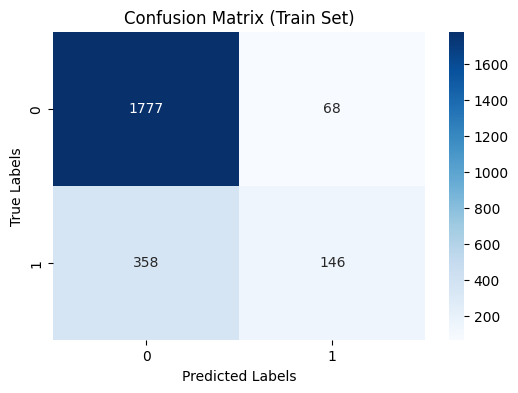

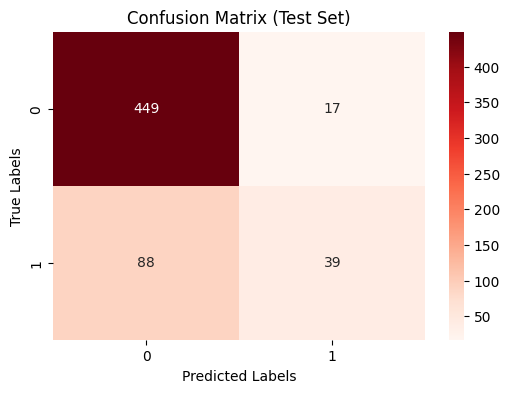

In [68]:
# Confusion matrix untuk train set svc
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set svc
cm_train = confusion_matrix(y_test, y_pred_test_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model memprediksi TP sebesar 39, TN 449, FN 88, dan FP 17 

2. Model bersifat underfitting

### Score RF

In [69]:
#melihat score model svm
print('classification Train Set RF: \n', classification_report(y_train_no_outliers, y_pred_train_rf))
print('classification Test Set  RF: \n', classification_report(y_test, y_pred_test_rf))

classification Train Set RF: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1845
           1       1.00      0.99      0.99       504

    accuracy                           1.00      2349
   macro avg       1.00      0.99      0.99      2349
weighted avg       1.00      1.00      1.00      2349

classification Test Set  RF: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       466
           1       0.56      0.29      0.38       127

    accuracy                           0.80       593
   macro avg       0.69      0.61      0.63       593
weighted avg       0.77      0.80      0.77       593



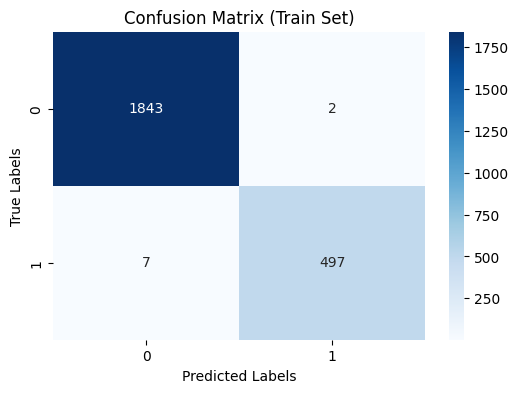

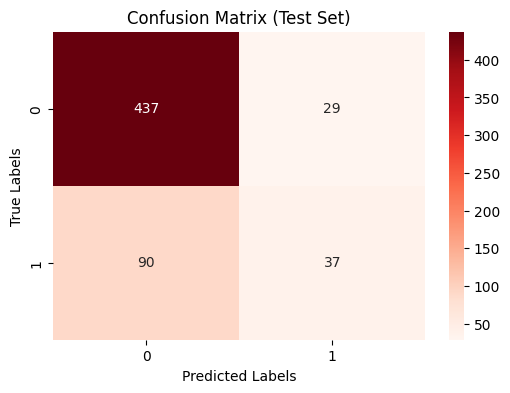

In [70]:
# Confusion matrix untuk train set rf
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set rf
cm_train = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model RF memprediksi test set TP sebesar 33, TN 439, FN 94, dan FP 27

2. Model bersifat overfitting

3. Model cenderung memprediksikan Negative/0

4. Overfitting terjadi karena tidak diatur max depthnya

### score DT

In [71]:
#melihat score model svm
print('classification Train Set dt: \n', classification_report(y_train_no_outliers, y_pred_train_dt))
print('classification Test Set  dt: \n', classification_report(y_test, y_pred_test_dt))

classification Train Set dt: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1845
           1       1.00      0.98      0.99       504

    accuracy                           1.00      2349
   macro avg       1.00      0.99      0.99      2349
weighted avg       1.00      1.00      1.00      2349

classification Test Set  dt: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       466
           1       0.29      0.31      0.30       127

    accuracy                           0.69       593
   macro avg       0.55      0.55      0.55       593
weighted avg       0.70      0.69      0.69       593



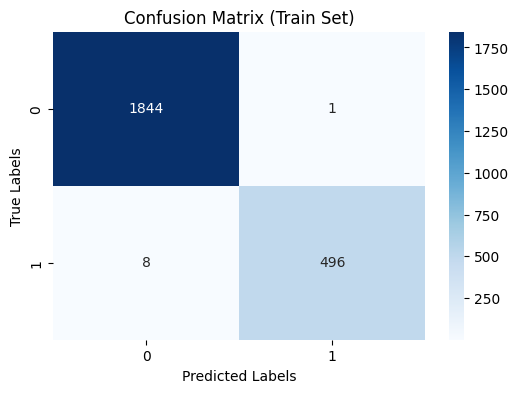

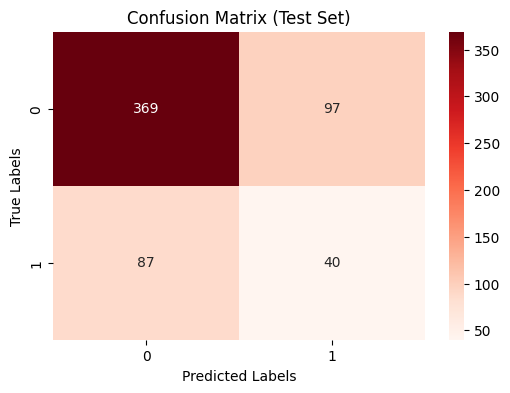

In [72]:
# Confusion matrix untuk train set dt
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set dt
cm_train = confusion_matrix(y_test, y_pred_test_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model DT memprediksi test set TP sebesar 35, TN 367, FN 99, dan FP 92

2. Model bersifat overfitting

3. Model cenderung memprediksikan Negative/0

4. Overfitting terjadi karena model tidak diatur max_depthnya

### Score KNN

In [73]:
#melihat score model svm
print('classification Train Set knn: \n', classification_report(y_train_no_outliers, y_pred_train_knn))
print('classification Test Set  knn: \n', classification_report(y_test, y_pred_test_knn))

classification Train Set knn: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1845
           1       0.72      0.43      0.54       504

    accuracy                           0.84      2349
   macro avg       0.79      0.69      0.72      2349
weighted avg       0.83      0.84      0.83      2349

classification Test Set  knn: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       466
           1       0.58      0.38      0.46       127

    accuracy                           0.81       593
   macro avg       0.71      0.65      0.67       593
weighted avg       0.79      0.81      0.79       593



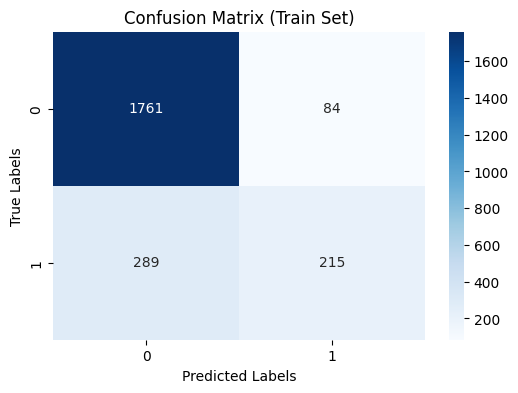

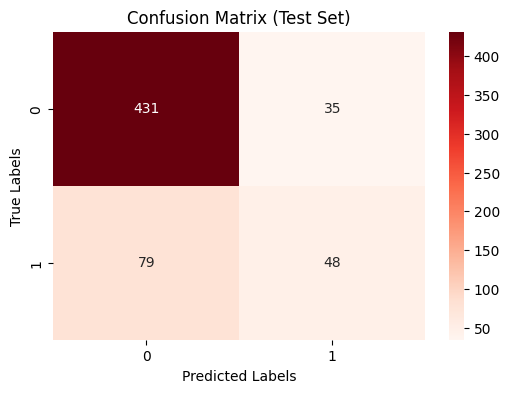

In [74]:
# Confusion matrix untuk train set knn
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set knn
cm_train = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model KNN memprediksi test set TP sebesar 48, TN 431, FN 79, dan FP 35

2. Model bersifat overfitting meskipun kecil

3. Model cenderung memprediksikan Negative/0

### Score NB

In [75]:
#melihat score model nb
print('classification Train Set nb: \n', classification_report(y_train_no_outliers, y_pred_train_nb))
print('classification Test Set  nb: \n', classification_report(y_test, y_pred_test_nb))

classification Train Set nb: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1845
           1       0.54      0.42      0.47       504

    accuracy                           0.80      2349
   macro avg       0.69      0.66      0.67      2349
weighted avg       0.78      0.80      0.79      2349

classification Test Set  nb: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       466
           1       0.55      0.44      0.49       127

    accuracy                           0.80       593
   macro avg       0.71      0.67      0.69       593
weighted avg       0.79      0.80      0.80       593



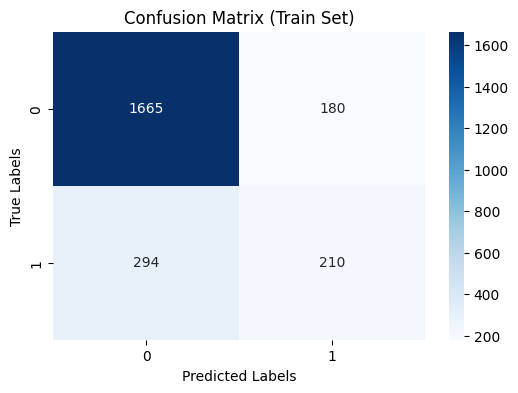

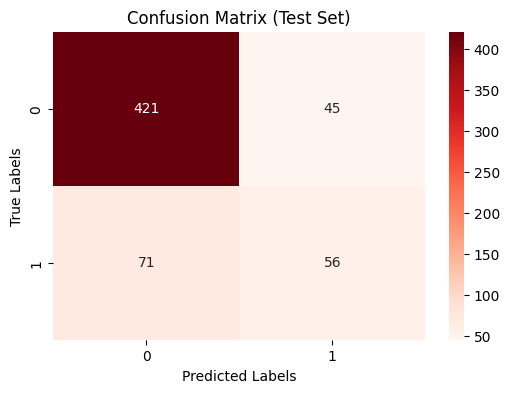

In [76]:
# Confusion matrix untuk train set nb
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set nb
cm_train = confusion_matrix(y_test, y_pred_test_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model NB memprediksi test set TP sebesar 56, TN 421, FN 71, dan FP 45

2. Model tidak mengalami overfitting tetapi underfitting

3. Model cenderung memprediksikan Negative/0

4. Ini merupakan model terbaik diantara base model yang lain

### Score Grad

In [77]:
#melihat score model grad
print('classification Train Set grad: \n', classification_report(y_train_no_outliers, y_pred_train_grad))
print('classification Test Set  grad: \n', classification_report(y_test, y_pred_test_grad))

classification Train Set grad: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1845
           1       0.78      0.36      0.49       504

    accuracy                           0.84      2349
   macro avg       0.81      0.67      0.70      2349
weighted avg       0.83      0.84      0.82      2349

classification Test Set  grad: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       466
           1       0.61      0.30      0.40       127

    accuracy                           0.81       593
   macro avg       0.72      0.62      0.64       593
weighted avg       0.79      0.81      0.78       593



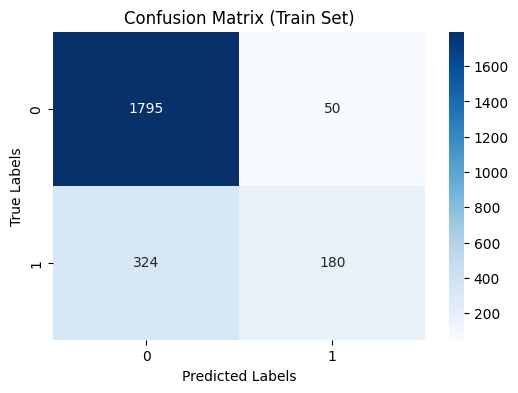

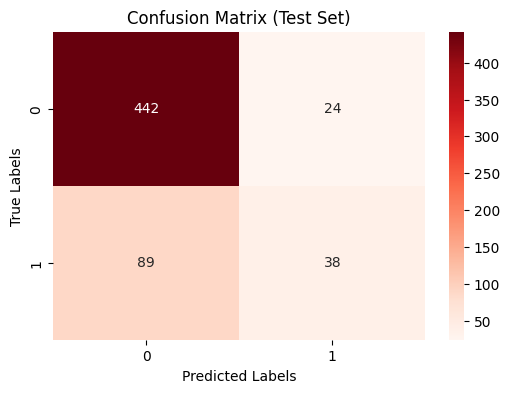

In [78]:
# Confusion matrix untuk train set grad
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_grad)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set grad
cm_train = confusion_matrix(y_test, y_pred_test_grad)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model GBC memprediksi test set TP sebesar 38, TN 443, FN 89, dan FP 23

2. Model bersifat underfitting

3. Model cenderung memprediksikan Negative/0

> 

### Kesimpulan sementara

1.  Karena Objective kita adalah meminimalisir nilai false positive atau memaksimalkan nilai True positive, kita bisa menentukan objective yang menurut kita paling penting.

2.  kalau mengutamakan meminimalisir nilai false positive kita bisa memakai model NB karena memiliki nilai false positive yang paling rendah yaitu 71 

3.  Nilai base model NB ternyata juga memiliki nilai True Positive paling tinggi yaitu 56

4.  Nilai base model NB memiliki nilai false positive yang tinggi sehingga yaitu 45 sehingga jika dipakai bisa mengurangi calon costumer karena petugas akan menolaknya karena dikira akan default 

## 12. Cross Validation

In [79]:
#cross validation model logistic regression
recall_score_train_cross_val_log = cross_val_score(model_log,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_log = cross_val_score(model_log,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean logistic regression : ', recall_score_train_cross_val_log.mean())
print('Recall score std logistic regression : ', recall_score_train_cross_val_log.std())
print('Precision score mean logistic regression : ', precision_score_train_cross_val_log.mean())
print('Precision score std logistic regression : ', precision_score_train_cross_val_log.std())
mean_recall_log=recall_score_train_cross_val_log.mean()
std_recall_log=recall_score_train_cross_val_log.std()
mean_precision_log=precision_score_train_cross_val_log.mean()
std_precision_log=precision_score_train_cross_val_log.std()

Recall score mean logistic regression :  0.20841584158415843
Recall score std logistic regression :  0.04154878268981641
Precision score mean logistic regression :  0.6513637033760873
Precision score std logistic regression :  0.052880349794926916


In [80]:
#cross validation model SVC
recall_score_train_cross_val_svm = cross_val_score(model_svm,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_svm = cross_val_score(model_svm,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean SVC : ', recall_score_train_cross_val_svm.mean())
print('Recall score std SVC : ', recall_score_train_cross_val_svm.std())
print('Precision score mean SVC : ', precision_score_train_cross_val_svm.mean())
print('Precision score std SVC : ', precision_score_train_cross_val_svm.std())
mean_recall_svm=recall_score_train_cross_val_svm.mean()
std_recall_svc=recall_score_train_cross_val_svm.std()
mean_precision_svm=precision_score_train_cross_val_svm.mean()
std_precision_svc=precision_score_train_cross_val_svm.std()

Recall score mean SVC :  0.28174257425742577
Recall score std SVC :  0.041781408655106156
Precision score mean SVC :  0.6636368772954139
Precision score std SVC :  0.040799732489524856


In [81]:
#cross validation model RF
recall_score_train_cross_val_rf = cross_val_score(model_rf,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_rf = cross_val_score(model_rf,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean RF : ', recall_score_train_cross_val_rf.mean())
print('Recall score std rf : ', recall_score_train_cross_val_rf.std())
print('Precision score mean RF : ', precision_score_train_cross_val_rf.mean())
print('Precision score std RF : ', precision_score_train_cross_val_rf.std())
mean_recall_rf=recall_score_train_cross_val_rf.mean()
std_recall_rf=recall_score_train_cross_val_rf.std()
mean_precision_rf=precision_score_train_cross_val_rf.mean()
std_precision_rf=precision_score_train_cross_val_rf.std()

Recall score mean RF :  0.2996039603960396
Recall score std rf :  0.041241397376458815
Precision score mean RF :  0.554809907437173
Precision score std RF :  0.07090321961647157


In [82]:
#cross validation model dt
recall_score_train_cross_val_dt = cross_val_score(model_dt,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_dt = cross_val_score(model_dt,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean dt : ', recall_score_train_cross_val_dt.mean())
print('Recall score std dt : ', recall_score_train_cross_val_dt.std())
print('Precision score mean dt : ', precision_score_train_cross_val_dt.mean())
print('Precision score std dt : ', precision_score_train_cross_val_dt.std())
mean_recall_dt=recall_score_train_cross_val_dt.mean()
std_recall_dt=recall_score_train_cross_val_dt.std()
mean_precision_dt=precision_score_train_cross_val_dt.mean()
std_precision_dt=precision_score_train_cross_val_dt.std()

Recall score mean dt :  0.35516831683168315
Recall score std dt :  0.007729978866538369
Precision score mean dt :  0.32882498969077856
Precision score std dt :  0.04513500125554875


In [83]:
#cross validation model knn
recall_score_train_cross_val_knn = cross_val_score(model_knn,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_knn = cross_val_score(model_knn,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean knn : ', recall_score_train_cross_val_knn.mean())
print('Recall score std knn : ', recall_score_train_cross_val_knn.std())
print('Precision score mean knn : ', precision_score_train_cross_val_knn.mean())
print('Precision score std knn : ', precision_score_train_cross_val_knn.std())
mean_recall_knn=recall_score_train_cross_val_knn.mean()
std_recall_knn=recall_score_train_cross_val_knn.std()
mean_precision_knn=precision_score_train_cross_val_knn.mean()
std_precision_knn=precision_score_train_cross_val_knn.std()

Recall score mean knn :  0.27382178217821784
Recall score std knn :  0.038470594848191896
Precision score mean knn :  0.4883861357522399
Precision score std knn :  0.06587086566011338


In [84]:
#cross validation model nb
recall_score_train_cross_val_nb = cross_val_score(model_nb,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_nb = cross_val_score(model_nb,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean nb : ', recall_score_train_cross_val_nb.mean())
print('Recall score std nb : ', recall_score_train_cross_val_nb.std())
print('Precision score mean nb : ', precision_score_train_cross_val_nb.mean())
print('Precision score std nb : ', precision_score_train_cross_val_nb.std())
mean_recall_nb=recall_score_train_cross_val_nb.mean()
std_recall_nb=recall_score_train_cross_val_nb.std()
mean_precision_nb=precision_score_train_cross_val_nb.mean()
std_precision_nb=precision_score_train_cross_val_nb.std()

Recall score mean nb :  0.41671287128712875
Recall score std nb :  0.058056434216762716
Precision score mean nb :  0.539286742703073
Precision score std nb :  0.06528230454156055


In [85]:
#cross validation model grad
recall_score_train_cross_val_grad = cross_val_score(model_grad,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="recall")
precision_score_train_cross_val_grad = cross_val_score(model_grad,X_train_final_reduced_features_no_outliers, y_train_no_outliers,cv=5,scoring="precision")
print('Recall score mean gradient boosting : ', recall_score_train_cross_val_grad.mean())
print('Recall score std gradient boosting : ', recall_score_train_cross_val_grad.std())
print('Precision score mean gradient boosting : ', precision_score_train_cross_val_grad.mean())
print('Precision score std gradient boosting : ', precision_score_train_cross_val_grad.std())
mean_recall_grad=recall_score_train_cross_val_grad.mean()
std_recall_grad=recall_score_train_cross_val_grad.std()
mean_precision_grad=precision_score_train_cross_val_grad.mean()
std_precision_grad=precision_score_train_cross_val_grad.std()

Recall score mean gradient boosting :  0.28380198019801983
Recall score std gradient boosting :  0.04959554482870605
Precision score mean gradient boosting :  0.6073006475485662
Precision score std gradient boosting :  0.09749497615841175


In [86]:
#menyatukan semua score cross validation kedalam dataframe
score_reports = {
    "model":["LogisticRegression","SVM","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","GaussianNB","GradientBoostingClassifier"],
    "mean_Recall" : [mean_recall_log,mean_recall_svm,mean_recall_rf,mean_recall_dt,mean_recall_knn,mean_recall_nb,mean_recall_grad],
    "mean_Precision" : [mean_precision_log,mean_precision_svm,mean_precision_rf,mean_precision_dt,mean_precision_knn,mean_precision_nb,mean_precision_grad],
    "STD_recall": [std_recall_log,std_recall_svc,std_recall_rf,std_recall_dt,std_recall_knn,std_recall_nb,std_recall_grad],
    "STD_precision": [std_precision_log,std_precision_svc,std_precision_rf,std_precision_dt,std_precision_knn,std_precision_nb,std_precision_grad]
    }
cv=pd.DataFrame(score_reports)
cv

model  mean_Recall  mean_Precision  STD_recall  \
0          LogisticRegression     0.208416        0.651364    0.041549   
1                         SVM     0.281743        0.663637    0.041781   
2      RandomForestClassifier     0.299604        0.554810    0.041241   
3      DecisionTreeClassifier     0.355168        0.328825    0.007730   
4        KNeighborsClassifier     0.273822        0.488386    0.038471   
5                  GaussianNB     0.416713        0.539287    0.058056   
6  GradientBoostingClassifier     0.283802        0.607301    0.049596   

   STD_precision  
0       0.052880  
1       0.040800  
2       0.070903  
3       0.045135  
4       0.065871  
5       0.065282  
6       0.097495

In [87]:
#menambah f1 score secara manual dan sorting menurut STD_recall
cv['F1_Score'] = 2 * (cv['mean_Precision'] * cv['mean_Recall']) / (cv['mean_Precision'] + cv['mean_Recall'])
cv.sort_values("STD_recall")

model  mean_Recall  mean_Precision  STD_recall  \
3      DecisionTreeClassifier     0.355168        0.328825    0.007730   
4        KNeighborsClassifier     0.273822        0.488386    0.038471   
2      RandomForestClassifier     0.299604        0.554810    0.041241   
0          LogisticRegression     0.208416        0.651364    0.041549   
1                         SVM     0.281743        0.663637    0.041781   
6  GradientBoostingClassifier     0.283802        0.607301    0.049596   
5                  GaussianNB     0.416713        0.539287    0.058056   

   STD_precision  F1_Score  
3       0.045135  0.341489  
4       0.065871  0.350904  
2       0.070903  0.389093  
0       0.052880  0.315789  
1       0.040800  0.395555  
6       0.097495  0.386831  
5       0.065282  0.470142

In [88]:
#sorting menurut f1 Score
cv.sort_values("F1_Score")

model  mean_Recall  mean_Precision  STD_recall  \
0          LogisticRegression     0.208416        0.651364    0.041549   
3      DecisionTreeClassifier     0.355168        0.328825    0.007730   
4        KNeighborsClassifier     0.273822        0.488386    0.038471   
6  GradientBoostingClassifier     0.283802        0.607301    0.049596   
2      RandomForestClassifier     0.299604        0.554810    0.041241   
1                         SVM     0.281743        0.663637    0.041781   
5                  GaussianNB     0.416713        0.539287    0.058056   

   STD_precision  F1_Score  
0       0.052880  0.315789  
3       0.045135  0.341489  
4       0.065871  0.350904  
6       0.097495  0.386831  
2       0.070903  0.389093  
1       0.040800  0.395555  
5       0.065282  0.470142

In [89]:
#sorting menurut STD_precision
cv.sort_values("STD_precision")

model  mean_Recall  mean_Precision  STD_recall  \
1                         SVM     0.281743        0.663637    0.041781   
3      DecisionTreeClassifier     0.355168        0.328825    0.007730   
0          LogisticRegression     0.208416        0.651364    0.041549   
5                  GaussianNB     0.416713        0.539287    0.058056   
4        KNeighborsClassifier     0.273822        0.488386    0.038471   
2      RandomForestClassifier     0.299604        0.554810    0.041241   
6  GradientBoostingClassifier     0.283802        0.607301    0.049596   

   STD_precision  F1_Score  
1       0.040800  0.395555  
3       0.045135  0.341489  
0       0.052880  0.315789  
5       0.065282  0.470142  
4       0.065871  0.350904  
2       0.070903  0.389093  
6       0.097495  0.386831

> Evaluasi Setelah di Cross Validation
1. Menurut recall score NB memiliki nilai score terbaik yaitu 0.416

2. Menurut precision score SVM memiliki nilai score terbaik yaitu 0.663

3. Menurut F1 score NB memiliki nilai score terbaik yaitu 0.470

4. Menurut STD_recall RF memiliki nilai score terbaik yaitu 0.033

5. Menurut STD_precision SVM memiliki nilai score terbaik yaitu 0.041

4. Keseluruhan model masih sangat underfitting, penyebabnya bisa jadi karena Feature engginering,atatu feature selection yang tidak benar yang tidak benar atau karena memang datanya yang kurang bagus

5. Saya akan tuning model naive bayes karena meskipun underfitting, nb adalah model yang memiliki keseluruhan score yang terbaik karena memiliki nilai recall dan f1 score yang terbaik dan STD dari recall dan precision masih sangat kecil di  0.05 dan 0.09 yang menandakan bahwa model menghasilkan score yang konsisten

## 13. Best Model Tuning

In [90]:
#buat parameter untuk gridsearch
parameters = {
    'priors': [None, [0.3, 0.7], [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-8, 1e-7],
}

In [91]:
# Buat obejek GridSearchCV
grid_search = GridSearchCV(model_nb, param_grid=parameters, cv=5, n_jobs=5)

In [92]:
# melakukan grid search
grid_search.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=5,
             param_grid={'priors': [None, [0.3, 0.7], [0.5, 0.5]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [93]:
#menampilkan best parameter dan scorenya
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
best_params = grid_search.best_params_

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Best Score: 0.798218935716554


In [94]:
#inisialisasi nb dengan parameter tuning sesuai best gridsearch
model_nb_best=GaussianNB(**best_params)

In [95]:
#training model
model_nb_best.fit(X_train_final_reduced_features_no_outliers, y_train_no_outliers)

GaussianNB()

In [96]:
# evaluasi model nb
y_pred_train_nb_best = model_nb_best.predict(X_train_final_reduced_features_no_outliers)
y_pred_test_nb_best = model_nb_best.predict(X_test_final_reduced_features_no_outliers)

### Best Model Evaluation

In [97]:
#melihat score model nb tuned
print('classification Train Set nb Tuned : \n', classification_report(y_train_no_outliers, y_pred_train_nb_best))
print('classification Test Set nb Tuned: \n', classification_report(y_test, y_pred_test_nb_best))

classification Train Set nb Tuned : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1845
           1       0.54      0.42      0.47       504

    accuracy                           0.80      2349
   macro avg       0.69      0.66      0.67      2349
weighted avg       0.78      0.80      0.79      2349

classification Test Set nb Tuned: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       466
           1       0.55      0.44      0.49       127

    accuracy                           0.80       593
   macro avg       0.71      0.67      0.69       593
weighted avg       0.79      0.80      0.80       593



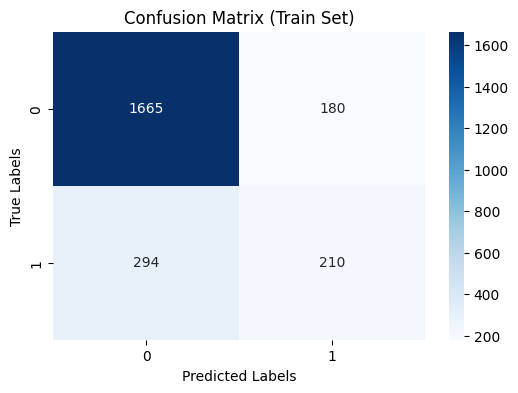

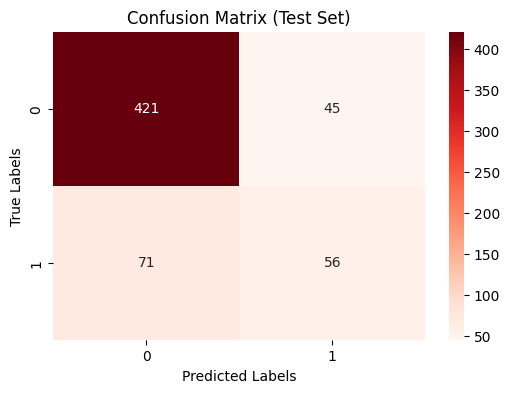

In [98]:
# Confusion matrix untuk train set nb_best
cm_train = confusion_matrix(y_train_no_outliers, y_pred_train_nb_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set nb_best
cm_train = confusion_matrix(y_test, y_pred_test_nb_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
- Hasil nya sama persis dengan base model karena setelah di cek best param yang ditemukan gridsearch sama dengan base model gaussianNb

#### Mencoba dengan data yang tidak di feature selection

In [99]:
#inisialisasi nb dengan parameter tuning sesuai best gridsearch
model_nb_best_pure=GaussianNB(**best_params)

In [100]:
#training model
model_nb_best_pure.fit(X_train_final, y_train)

GaussianNB()

In [101]:
# coba dengan data yang tidak di fitur engginering
# evaluasi model nb
y_pred_train_nb_best_norm = model_nb_best_pure.predict(X_train_final)
y_pred_test_nb_best_norm = model_nb_best_pure.predict(X_test_final)

In [102]:
#melihat score model nb tuned
print('classification Train Set nb Tuned : \n', classification_report(y_train, y_pred_train_nb_best_norm))
print('classification Test Set nb Tuned: \n', classification_report(y_test, y_pred_test_nb_best_norm))

classification Train Set nb Tuned : 
               precision    recall  f1-score   support

           0       0.91      0.31      0.46      1863
           1       0.26      0.88      0.40       508

    accuracy                           0.43      2371
   macro avg       0.58      0.60      0.43      2371
weighted avg       0.77      0.43      0.45      2371

classification Test Set nb Tuned: 
               precision    recall  f1-score   support

           0       0.92      0.31      0.46       466
           1       0.26      0.91      0.41       127

    accuracy                           0.44       593
   macro avg       0.59      0.61      0.43       593
weighted avg       0.78      0.44      0.45       593



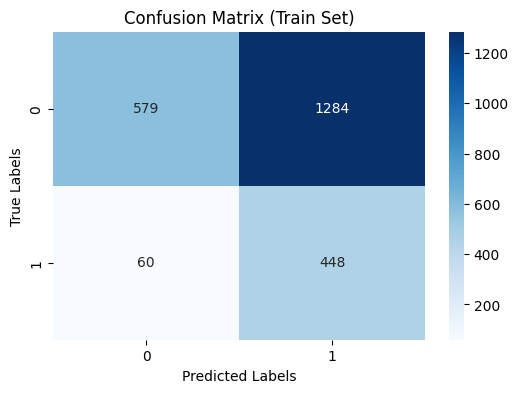

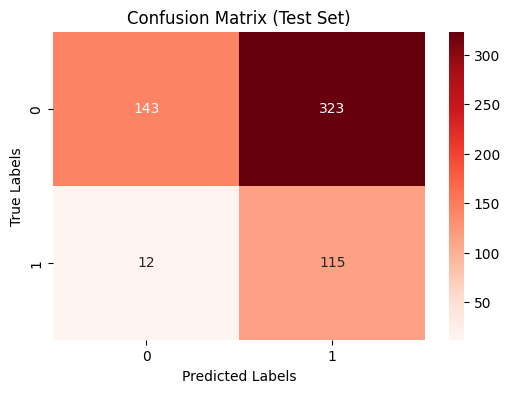

In [103]:
# Confusion matrix untuk train set nb_best_norm
cm_train = confusion_matrix(y_train, y_pred_train_nb_best_norm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix untuk test set nb_best_norm
cm_train = confusion_matrix(y_test, y_pred_test_nb_best_norm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

> Evaluasi Model
1. Model ini memprediksi test set TP sebesar 115, TN 143, FN 12, dan FP 323

2. Model bersifat overfitting

3. Model cenderung memprediksikan positive/1

4. Karena problem statement yang pertama adalah perusahaan mengalami kerugian karena banyak nsabah yang default maka model ini tidak cocok karena gagal menyaring customer yang kenyataanya akan default

### Mencari ciri-data yang bernilai true positif dari hasil NB best

In [113]:
X_test_final_reduced_features_no_outliers

limit_balance  sex education_level marital_status pay_2 pay_3 bill_amt_2  \
0       -1.056018  1.0             3.0            1.0  -2.0  -2.0  -0.818700   
1       -0.882925  2.0             2.0            1.0   0.0   0.0  -0.164683   
2       -0.536741  2.0             3.0            1.0  -1.0  -1.0  -0.725953   
3       -0.623287  1.0             1.0            2.0   0.0   0.0   0.188204   
4        0.328721  2.0             1.0            2.0   0.0   0.0   2.696553   
..            ...  ...             ...            ...   ...   ...        ...   
588     -0.709833  1.0             3.0            1.0   0.0   0.0  -0.358926   
589      1.626913  2.0             2.0            1.0   0.0   0.0   0.649004   
590     -0.969472  1.0             1.0            2.0   2.0   0.0  -0.038126   
591     -0.104010  2.0             1.0            2.0   0.0   0.0  -0.119744   
592      0.328721  2.0             1.0            1.0  -2.0  -2.0  -0.818700   

    bill_amt_3 pay_amt_2 pay_amt_3  
0    -0.816981 -0.807181 -0.744452  
1    -0.168557 -0.480248 -0.449967  
2    -0.525873  2.278180 -0.663573  
3     0.356555  0.638044 -0.080823  
4     2.834642  0.611874  0.707236  
..         ...       ...       ...  
588  -0.325241 -0.416580 -0.329684  
589   0.782345  0.172447  0.292468  
590  -0.064795 -0.421853 -0.374479  
591  -0.084641  1.145826  1.330011  
592  -0.816981 -0.807181 -0.744452  

[593 rows x 10 columns]

In [117]:
y_test_temp2=y_test.copy()

In [118]:
y_test_temp2.reset_index(drop=True, inplace=True)

In [129]:
test_with_pred = pd.concat([X_test_final_reduced_features_no_outliers, y_test_temp2], axis=1)
test_with_pred["prediksi"]=y_pred_test_nb_best

In [132]:
true_positive = test_with_pred[test_with_pred['default_payment_next_month'] == 1][test_with_pred['prediksi'] == 1]
true_positive

C:\Users\Evan\AppData\Local\Temp\ipykernel_12208\1364243559.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_positive = test_with_pred[test_with_pred['default_payment_next_month'] == 1][test_with_pred['prediksi'] == 1]


(limit_balance,)  (sex,)  (education_level,)  (marital_status,)  \
21          -1.229110     2.0                 2.0                1.0   
35          -0.969472     2.0                 1.0                2.0   
51           0.588359     2.0                 2.0                2.0   
71           0.588359     1.0                 2.0                2.0   
83          -0.882925     2.0                 2.0                2.0   
86          -1.229110     2.0                 3.0                1.0   
87          -0.969472     2.0                 1.0                1.0   
114         -0.709833     1.0                 2.0                1.0   
124         -1.315656     2.0                 3.0                2.0   
142          1.194182     2.0                 2.0                1.0   
143         -1.142564     1.0                 2.0                1.0   
153         -0.969472     1.0                 3.0                1.0   
156         -1.142564     1.0                 2.0                2.0   
185         -0.969472     2.0                 2.0                2.0   
186         -1.142564     1.0                 2.0                2.0   
208         -0.536741     1.0                 2.0                1.0   
232          2.059643     1.0                 2.0                1.0   
238         -0.709833     2.0                 3.0                1.0   
244         -0.882925     1.0                 2.0                2.0   
251         -0.969472     2.0                 1.0                2.0   
262         -1.229110     1.0                 2.0                1.0   
263          0.415267     1.0                 3.0                1.0   
266          0.501813     2.0                 2.0                1.0   
268          0.242174     2.0                 2.0                2.0   
286          0.155628     2.0                 1.0                2.0   
290          0.328721     1.0                 2.0                2.0   
299         -1.229110     1.0                 3.0                2.0   
303         -0.796379     1.0                 3.0                1.0   
304         -0.277102     2.0                 3.0                1.0   
309         -0.969472     2.0                 2.0                2.0   
310         -1.056018     2.0                 2.0                2.0   
316         -1.142564     2.0                 2.0                2.0   
324         -1.229110     2.0                 2.0                2.0   
330         -0.363649     1.0                 3.0                1.0   
337         -1.229110     1.0                 3.0                2.0   
338         -1.056018     1.0                 2.0                2.0   
344         -1.142564     2.0                 3.0                2.0   
378         -0.017464     2.0                 2.0                2.0   
389         -0.969472     2.0                 1.0                2.0   
392         -0.104010     1.0                 1.0                2.0   
421          0.847997     2.0                 1.0                1.0   
439         -0.969472     1.0                 3.0                1.0   
444         -1.142564     2.0                 2.0                2.0   
451          0.328721     2.0                 2.0                1.0   
452         -0.882925     2.0                 2.0                1.0   
463         -1.142564     1.0                 3.0                2.0   
484         -0.709833     2.0                 2.0                1.0   
488         -0.363649     2.0                 1.0                2.0   
498         -1.142564     1.0                 3.0                2.0   
503         -0.623287     2.0                 2.0                2.0   
534         -1.142564     2.0                 1.0                2.0   
549          0.501813     1.0                 3.0                1.0   
555         -0.536741     1.0                 2.0                1.0   
578         -0.104010     2.0                 3.0                1.0   
585          0.501813     2.0                

> __Evaluasi hasil TP__
1. ada 56 data yang true positive

2. tidak ada ciri-ciri khusus yang bisa ditangkap saat ditelusuri

## 14. Kesimpulan, Insight, dan Saran


> __Kesimpulan Keseluruhan Model :__
1. Semua Model yang dibuat saat projek ini tidak layak pakai semua karena semuanya memiliki sifat underfitting. ini mungkin disebabkan karena pengurangan fitur yang banyak atau karena pemilihan fitur yang tidak tepat.

2. Setelah di cek dengan gridsearchCV parameter yang paling tepat untuk model gausianNB untuk data ini sama dengan default parameternya yaitu ['priors': None, 'var_smoothing': 1e-09]

3. Penggunaan Model dengan data yang tidak dibuang outliernya dan fitur yang tidak dikurangi membuat model cenderung memberikan nilai 1 (default) sehingga menurut saya lebih baik menggunakan model yang dikurangi fitur dan didrop outliernya sehingga setidaknya jika ada customer yang terprediksi akan default bisa kita tidak menerima customer itu dengan yakin dan jika ada customer yang terprediksi tidak akan default, petugas bisa mencaritahu lebih lanjut tentang customer ini dan memberikan keputusan sesuai dengan pendapat pribadi dan pengalaman petugas tersebut.  

> __Implementasi Bisnis Model :__   
 - Jika model ini di implementasikan maka model ini bisa dipakai sebagai filter pertama untuk pengambilan keputusan untuk memberikan credit kepada customer. contoh:  

1. Jika model memprediksikan bahwa customer akan default maka petugas bisa langsung menolak permintaan customer tanpa penyelidikan lebih lanjut untuk mengurangi tenaga dan biaya.  

2. Jika model memprediksi bahwa customer tidak akan default maka petugas bisa meggunakan pendapat pribadi berdasarkan penyelidikan lebih lanjut serta pengalaman mereka untuk menerima permintaan credit customer itu atau tidak

> __Insight dari EDA__
1. Customer dengan education level 3 (highs_school) ada sebesar 483 dari total keseluruhan data sebesar 2965 yang berarti 16.2% dari total keseluruhan total customer yang default dengan education level 3 sebesar 113 data dari 635 yang berarti 17.8%

2. Customer dengan education level 2 (university) ada sebesar 47,2% dari total keseluruhan data tetapi customer ini menyumbang sebesar 53.9% data yang default.

3. Sebagian besar nasabah memiliki education level 1,2,3

4. Sebagian besar nasabah memiliki limit balance di kisaran 10.000 New Dollar Taiwan - 100.000 New Dollar Taiwan 

5. Terdapat perbedaan gender gap yang besar yaitu 60.78% female dan 39.22% male

6. Meskipun Female memiliki data yang lebih banyak tapi mereka memiliki persenan default yang lebih kecil dibanding male 

> __Futher Improvement :__

1. Untuk peningkatan peforma model bisa ditingkakan lagi jumlah fiturnya. karena model gausianNB ini cenderung underfitting.

2. Bisa melakukan feature engginering yang lain seperti handling cardinality untuk fitur kategorik yang telah di encode (seperti education level yang mempunyai 2 nilai unknown yaitu 5, dan 6)

3. Bisa mencoba menggunakan parameter tuning terhadap model DT dan RF karena dengan default model tidak ada max_depth nya sehingga model mengalami overfitting yang parah. mungkin jika di setting max_depthnya meskipun hasil dari train score berkurang tetapi hasil dari test score bertambah




## 15. Conceptual Problem dan Referensi

>  __Soal__

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Jelaskan apa yang dimaksud dengan Cross Validation !

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

> __Jawaban__

1. Criterion dalam decision tree adalah parameter yang digunakan untuk mengukur pemisahan variabel. dalam decision tree criterion ada 3 yaitu gini,entropy, dan log_loss karena saya dalam project ini hanya menggunakan default model dari decision tree maka model decision tree disini menggunakan gini. gini mengukur tingkat impurity dari data. semakin rendah nilai gini semakin pure pemisahan data

2. Pruning dalam decision tree adalah teknik yang digunakan untuk mengurangi kompleksitas model dengan cara memotong decision nodes yang tidak memberikan manfaat yang signifikan kedalam kerja model. Alasan melakukan pruningg adalah untuk mencegah overfitting dan meningkatkan kemampuan model untuk memprediksi data baru. dan jenis pruning ada 2 yaitu :
    - Pre-Pruning: Proses ini melibatkan penghentian pembentukan pohon keputusan sebelum mencapai kondisi pohon yang sempurna. Beberapa kriteria yang digunakan untuk pre-pruning termasuk jumlah minimum sampel yang diperlukan pada simpul, tingkat kesalahan klasifikasi minimum yang diperbolehkan pada simpul, atau tingkat impurity maksimum yang diperbolehkan pada simpul. 

    - Post-Pruning: Proses ini melibatkan pembentukan pohon keputusan yang lengkap terlebih dahulu, dan kemudian memangkas atau menghapus cabang-cabang yang tidak signifikan atau tidak memberikan manfaat yang signifikan.

3. Untuk memilih nilai K yang optimal dapat dilakukan crossvalidation dan gridsearch

4. Cross-validation adalah suatu metode evaluasi model yang membagi data menjadi data train dan data validation yang saling tumpang tindih untuk melatih dan menguji model secara lebih akurat. Tujuan utama cross-validation adalah untuk memperoleh estimasi kinerja model lebih yang menggambarkan kemampuan sebenarnya dari model tersebut

5. -Accuracy adalah metric untuk menghitung berapa persen model memprediksi benar dalam data uji. accuracy digunakan ketika semua kelas memiliki proporsi yang hampir sama  
  
    -Precision adalah metric untuk mengukur seberapa akurat model dalam memprediksi label positif. Precision didefinisikan sebagai rasio antara jumlah true positive (TP) dengan jumlah total prediksi positive (TP+FP). precision digunakan ketika fokus utamanya adalah untuk meminimalisir jumlah prediksi positif yang salah (FP)  
      
    -Recall adalah metric untuk mengukur seberapa baik model dalam menemukan semua instance label positif dalam dataset. Recall didefinisikan sebagai rasio antara jumlah true positive (TP) dengan jumlah total instance label positif (TP+FN).recall digunakan ketika fokus utama adalah untuk menemukan semua instance positif
      
    -F1 score adalah ukuran rata-rata harmonik dari precision dan recall. metric ini digunakan ketika dibutuhkan keseimbangan antara precision dan recall

> __Refrensi__

1. https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12
2. https://txt.cohere.com/classification-eval-metrics/

## 16. Model Saving

In [104]:
with open('model_nb_best.pkl', 'wb') as file_1:
  pickle.dump(model_nb_best, file_1)

with open('model_scaler_standard.pkl', 'wb') as file_2:
  pickle.dump(scaler_standard, file_2)

with open('list_scale_columns.txt', 'w') as file_3:
  json.dump(scale_columns, file_3)

with open('list_norm_columns.txt', 'w') as file_4:
  json.dump(norm_columns, file_4)